# Exploring Slot Machine Data

### 요약
이 노트북의 목적은 [Data_Wrangling.ipynb](https://github.com/Jaepal/data-science-portfolio/blob/master/slot_machine/Data_Wrangling.ipynb)에서 만들어진 데이터의 특징을 탐색하는 것입니다. 데이터를 탐색하고, 이를 토대로 [게임 모델](https://github.com/Jaepal/data-science-portfolio/blob/master/slot_machine/slot.py)을 만들고 [Data_Modeling.ipynb](https://github.com/Jaepal/data-science-portfolio/blob/master/slot_machine/Data_Modeling.ipynb)에서 Multi-armed bandit 알고리즘을 통해 어느 Machine의 RTP가 가장 높은지 알아볼 것입니다.

### 시각화 내용

- [1. Platinum Slot](#platinum-1)
  * [1.1. 각 Symbol의 출현 빈도 확인](#platinum-1-1)
  * [1.2. Simulation 데이터 생성](#platinum-1-2)
  * [1.3. Platinum Slot 시각화](#platinum-1-3)
    + [1.3.1. RICHHITS 비교](#platinum-1-3-1)
    + [1.3.2. 각 reel 마다 같은 symbol이 나오는 빈도 비교](#platinum-1-3-2)
    + [1.3.3. 한 번의 spin마다 등장하는 symbol의 개수 비교](#platinum-1-3-3)
    + [1.3.4. 획득한 reward 금액과 payline의 길이(x3, x4, x5) 비교](#platinum-1-3-4)
- [2. Monster Slot](#monster-2)
  * [2.1. 각 Symbol의 출현 빈도 확인](#monster-2-1)
  * [2.2. Simulation 데이터 생성](#monster-2-2)
  * [2.3. Monster Slot 시각화](#monster-2-3)
    + [2.3.1. SCATTER 비교](#monster-2-3-1)
    + [2.3.2. 각 reel 마다 같은 symbol이 나오는 빈도 비교](#monster-2-3-2)
    + [2.3.3. 한 번의 spin마다 등장하는 symbol의 개수 비교](#monster-2-3-3)
    + [2.3.4. 획득한 reward 금액과 payline의 길이(x3, x4, x5) 비교](#monster-2-3-4)
- [3. Masquerade Slot](#masque-3)
  * [3.1. 각 Symbol의 출현 빈도 확인](#masque-3-1)
  * [3.2. Simulation 데이터 생성](#masque-3-2)
  * [3.3. Masquerade Slot 시각화](#masque-3-3)
    + [3.3.1. SCATTER 비교](#masque-3-3-1)
    + [3.3.2. 각 reel 마다 같은 symbol이 나오는 빈도 비교](#masque-3-3-2)
    + [3.3.3. 한 번의 spin마다 등장하는 symbol의 개수 비교](#masque-3-3-3)
    + [3.3.4. 획득한 reward 금액과 payline의 길이(x3, x4, x5) 비교](#masque-3-3-4)

In [3]:
# 필요한 패키지 불러오기

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns
import scipy.stats as st
from tqdm import tqdm
import copy

sns.set(style="darkgrid", font_scale=2)

%matplotlib inline

# 1. Platinum Slot <a name="platinum-1"></a>

In [4]:
pl_labels = ['10', 'J', 'Q', 'K', 'A', 'Ca', 'Co', 'D', 'Cr', 'W', 'R']

In [5]:
# csv 파일 불러오기

pl_slot_result = pd.read_csv('../data/slot_machine/platinum_csv/pl_all.csv')
pl_slot_result.head()

,img,classname
0,platinum_0_0.jpg,Ca
1,platinum_0_1.jpg,A
2,platinum_0_2.jpg,Q
3,platinum_0_3.jpg,W
4,platinum_0_4.jpg,A


In [6]:
# 각 칸의 결과마다 game, row, col column 생성

pl_slot_result_game = [int(i_name.split('_')[1]) for n, i_name in enumerate(pl_slot_result['img'])]
pl_slot_result_row = [int(i_name.split('_')[2].split('.')[0]) % 3 + 1 for n, i_name in enumerate(pl_slot_result['img'])]
pl_slot_result_col = [int(i_name.split('_')[2].split('.')[0]) // 3 + 1 for n, i_name in enumerate(pl_slot_result['img'])]

pl_slot_result['game'] = pl_slot_result_game
pl_slot_result['row'] = pl_slot_result_row
pl_slot_result['col'] = pl_slot_result_col

pl_slot_result.head(15)

,img,classname,game,row,col
0,platinum_0_0.jpg,Ca,0,1,1
1,platinum_0_1.jpg,A,0,2,1
2,platinum_0_2.jpg,Q,0,3,1
3,platinum_0_3.jpg,W,0,1,2
4,platinum_0_4.jpg,A,0,2,2
5,platinum_0_5.jpg,A,0,3,2
6,platinum_0_6.jpg,10,0,1,3
7,platinum_0_7.jpg,Cr,0,2,3
8,platinum_0_8.jpg,Co,0,3,3
9,platinum_0_9.jpg,10,0,1,4


In [7]:
tmp = []
pl_slot_result_per_game = []
for n, x in enumerate(pl_slot_result['classname']):
    tmp.append(x)
    if (n+1) % 15 == 0:
        pl_slot_result_per_game.append(tmp)
        tmp = []

---

## 1.1 각 Symbol의 출현 빈도 확인 <a name="platinum-1-1"></a>

In [8]:
# 각 Symbol의 출현 확률의 구체적인 수치 (%)

pl_slot_result['classname'].value_counts() / len(pl_slot_result) * 100

Q     13.236667
10    12.553333
K     12.073333
A     11.506667
J      9.543333
Ca     9.520000
Cr     8.760000
D      8.026667
Co     7.576667
R      4.040000
W      3.163333
Name: classname, dtype: float64

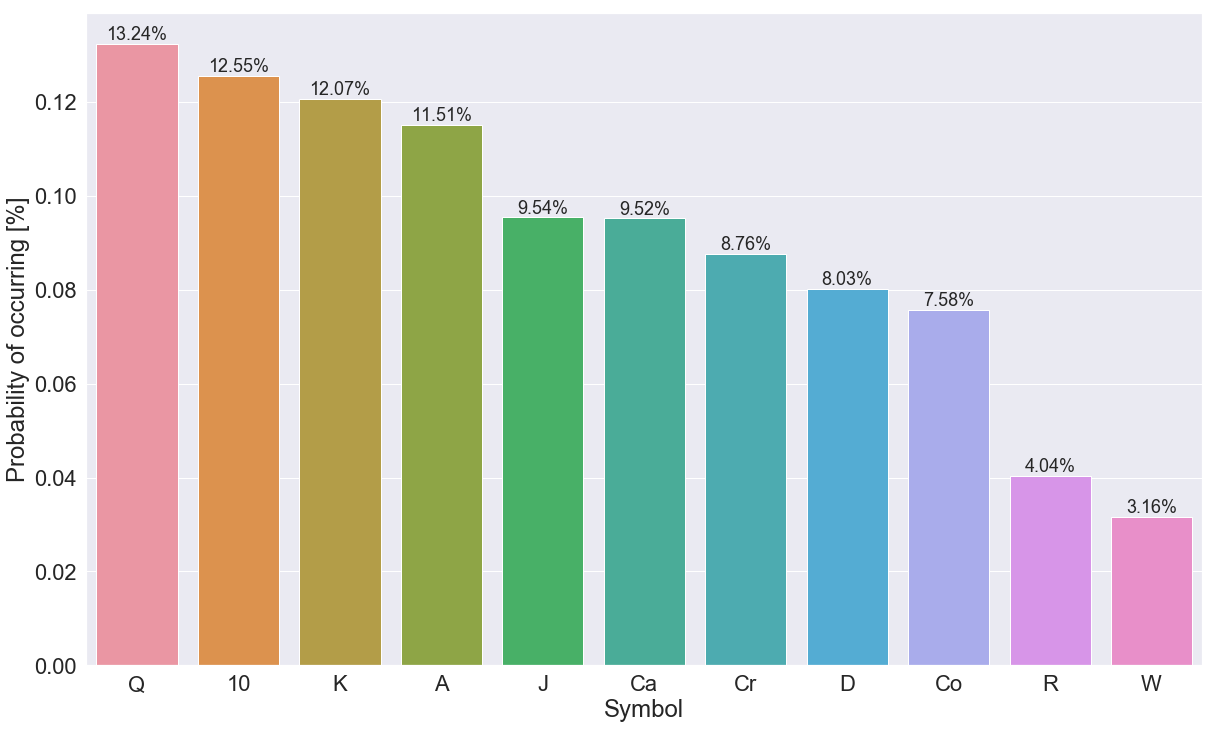

In [9]:
# 각 Symbol의 출현 확률 시각화

plt.figure(figsize=(20,12))
ax = sns.barplot(x=pl_slot_result['classname'].value_counts().index, y=pl_slot_result['classname'].value_counts() / len(pl_slot_result))
plt.xlabel("Symbol")
plt.ylabel("Probability of occurring [%]")


for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2f}%'.format(y*100), (x.mean(), y), ha='center', va='bottom', fontsize=18) # set the alignment of the text

plt.show()

각 Symbol의 출현 빈도는 Symbol의 낮은 value 순서와 완전히 같지는 않지만 대체로 비슷한 순서를 가지고 있는 것을 볼 수 있습니다.

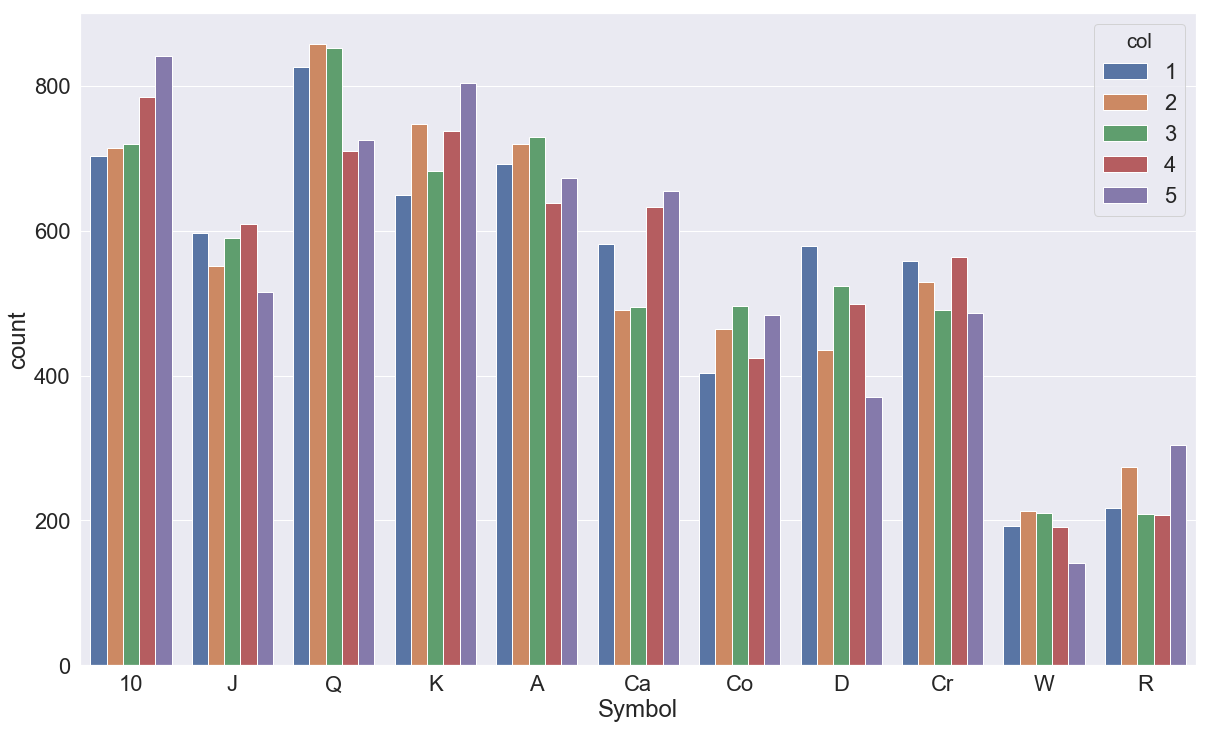

In [10]:
# 각 reel별 출현 횟수 시각화

plt.figure(figsize=(20,12))
sns.countplot(x='classname', data=pl_slot_result, hue='col', order=pl_labels)
plt.xlabel("Symbol")
plt.show()

---

각 reel(1, 2, 3, 4, 5)마다 Symbol의 빈도가 약간씩은 다르지만 대체로 비슷한 빈도로 나타나는 것을 알 수 있습니다.

## 1.2. Simulation 데이터 생성 <a name="platinum-1-2"></a>
각 15개의 칸이 위의 각 Symbol의 출현 확률을 가지고 완전히 독립적으로 작동한다는 가정 하에 2000번의 Simulation 데이터를 생성하고, 게임 모델을 보완하여 최대한 실제 게임과 가깝게 만들기 위해 실제 게임과의 차이를 확인합니다.

In [11]:
'''
# Baseline Model

2000번의 실제 게임 데이터를 기반으로 각 Symbol의 출현 빈도 설정

# Q   : 13.5 %
# 10  : 12.5 %
# K   : 12 %
# A   : 11.5 %
# J   : 9.5 %
# Ca  : 9.5 %
# Cr  : 9 %
# D   : 8 %
# Co  : 7.5 %
# R   : 4 %
# W   : 3 %
'''

# numpy의 randint를 통해 출현 확률을 기반으로 Symbol을 Return하는 함수

def getPlatinumSymbol(start, end):
    i = np.random.randint(start, end)
    if i <= 27:
        return 'Q'
    elif i <= 52 and i > 27:
        return '10'
    elif i <= 76 and i > 52:
        return 'K'
    elif i <= 99 and i > 76:
        return 'A'
    elif i <= 118 and i > 99:
        return 'J'
    elif i <= 137 and i > 118:
        return 'Ca'
    elif i <= 155 and i > 137:
        return 'Cr'
    elif i <= 171 and i > 155:
        return 'D'
    elif i <= 186 and i > 171:
        return 'Co'
    elif i <= 192 and i > 186:
        return 'W'
    elif i > 192:
        return 'R'

# 1회의 Spin 실행을 구현한 함수

def spin_platinum():
    game = []
    start = 1
    end = 201
    for i in range(15):
        if game.count('R') >= 9:
            end = 193
        game.append(getPlatinumSymbol(start, end))
    return game

# 플레이 횟수, 배팅 금액을 받아와서 게임을 플레이
def playPlatinum(n, bet):
    bpl = bet / 30
    pay_list = []
    while(n):
        game = spin_platinum()
        pay_list.append(calPlatinumPayline(game, bpl))
        n -= 1
    return pay_list

In [12]:
"""
# 경량화 버전
"""
col_types = ['3', '2-1', '2-2', '2-3', '1']
def getPlatinumColType(i):
    if i==0:
        return np.random.choice(col_types, 1, p=[0.545, 0.21, 0.09, 0.085, 0.07]).tolist()[0]
    if i==1:
        return np.random.choice(col_types, 1, p=[0.44, 0.195, 0.055, 0.225, 0.085]).tolist()[0]
    if i==2:
        return np.random.choice(col_types, 1, p=[0.465, 0.16, 0.06, 0.195, 0.12]).tolist()[0]
    if i==3:
        return np.random.choice(col_types, 1, p=[0.55, 0.10, 0.095, 0.215, 0.04]).tolist()[0]
    if i==4:
        return np.random.choice(col_types, 1, p=[0.39, 0.245, 0.035, 0.085, 0.245]).tolist()[0]

def getPlatinumSymbol(col_type, probs, r_full=0):
    if r_full:
        n_labels = pl_labels[:10]
        n_probs = [i / sum(probs[:10]) for i in probs[:10]]
    else:
        n_labels = pl_labels
        n_probs = [i / sum(probs) for i in probs]
    if col_type == '3':
        reel = np.random.choice(n_labels, 3, replace=False, p=n_probs).tolist()
    elif col_type == '2-1':
        reel = np.random.choice(n_labels, 2, replace=False, p=n_probs).tolist()
        reel.insert(1, reel[0])
    elif col_type == '2-2':
        reel = np.random.choice(n_labels, 2, replace=False, p=n_probs).tolist()
        reel.insert(2, reel[0])
    elif col_type == '2-3':
        reel = np.random.choice(n_labels, 2, replace=False, p=n_probs).tolist()
        reel.reverse()
        reel.insert(2, reel[1])
    elif col_type == '1':
        reel = np.random.choice(n_labels, 1, replace=False, p=n_probs).tolist() * 3
    return reel
"""
def getWeightedProbability(game):
    weight = [25, 19, 27, 24, 23, 19, 15, 16, 18, 6, 8]
    switch = [0] * 11
    unique_list = list(set(game))
    for n, s in enumerate(pl_labels):
        if s in unique_list:
            switch[n] = 2.1
        if s != 'R' and game.count(s) >= 7:
            switch[n] = 4.8
    probs = [w*(switch[n]+1) for n, w in enumerate(weight)]
    return probs
"""
"""
def getWeightedProbability(game):
    weight = [25, 19, 27, 24, 23, 19, 15, 16, 18, 6, 8]
    switch = [1] * 11
    game_copy = game.copy()
    tmp = []
    i = 1
    while(len(game_copy) >= 6):
        for _ in range(3):
            tmp.append(game_copy.pop(0))
        for n, s in enumerate(pl_labels):
            if s in tmp and s != 'R':
                switch[n] *= 2.5
    probs = [w*(switch[n]) for n, w in enumerate(weight)]
    return probs
"""
def getWeightedProbability(game):
    weight = [25, 19, 27, 24, 23, 19, 15, 16, 18, 6, 8]
    switch = [1] * 11
    game_copy = game.copy()
    reel_list = []
    tmp = []
    count = [0] * 11
    itr = 0
    while(len(game_copy) >= 3):
        for i in range(3):
            tmp.append(game_copy.pop(0))
        reel_list.append(tmp)
        for n, s in enumerate(pl_labels):
            
            if s in reel_list[itr]:
                count[n] += 1
            
            if s in tmp and s != 'R':
                switch[n] *= 1.5
            
        tmp = []
        itr += 1
    for i in range(len(count)-1):
        if count[i] == 2:
            switch[i] *= 7
        elif count[i] == 3:
            switch[i] *= 5
        elif count[i] == 4:
            switch[i] *= 5
        else:
            continue
    probs = [w*(switch[n]) for n, w in enumerate(weight)]
    
    return probs
def spin_platinum():
    game = []
    r_full = 0
    for i in range(5):
        probs = getWeightedProbability(game)
        if game.count('R') >= 9:
            r_full = 1
        col_type = getPlatinumColType(i)
        game.extend(getPlatinumSymbol(col_type, probs, r_full))
    return game


In [13]:
# 실행 결과를 담을 list
pl_simul_result_per_game = []

# 2000번의 게임을 실행
for i in range(2000):
    pl_simul_result_per_game.append(spin_platinum())

# 실제 게임 플레이 DataFrame을 불러와서 가상 게임플레이 데이터로 변경

pl_simul_result = pl_slot_result[['classname', 'game', 'row', 'col']]

pl_simul_classname = []

for game in pl_simul_result_per_game:
    for x in game:
        pl_simul_classname.append(x)

pl_simul_result['classname'] = pl_simul_classname

pl_simul_result.head(15)

C:\Users\Lee\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,classname,game,row,col
0,10,0,1,1
1,10,0,2,1
2,J,0,3,1
3,Co,0,1,2
4,Co,0,2,2
5,Ca,0,3,2
6,A,0,1,3
7,A,0,2,3
8,A,0,3,3
9,J,0,1,4


---

## 1.3. Platinum Slot 시각화 <a name="platinum-1-3"></a>

### 1.3.1. RICHHITS 비교 <a name="platinum-1-3-1"></a>

In [14]:
# 실제 게임의 게임당 RICHHITS 출현 횟수를 담은 list를 생성

pl_real_rich_count = []
for game in pl_slot_result_per_game:
    pl_real_rich_count.append(game.count('R'))

# 실제 게임의 Spin당 RICHHITS의 출현 갯수

print('# 실제 플레이 데이터의 각 Spin당 RICHHITS의 등장 개수')
pd.Series(pl_real_rich_count).value_counts()

# 실제 플레이 데이터의 각 Spin당 RICHHITS의 등장 개수


0    1242
1     434
2     223
3      77
4      19
5       5
dtype: int64

In [15]:
# 가상 게임의 게임당 RICHHITS 출현 횟수를 담은 list를 생성

pl_simul_rich_count = []
for game in pl_simul_result_per_game:
    pl_simul_rich_count.append(game.count('R'))

# 가상 게임의 Spin당 RICHHITS의 출현 갯수

print('# 가상 플레이 데이터의 각 Spin당 RICHHITS의 등장 개수')
pd.Series(pl_simul_rich_count).value_counts()

# 가상 플레이 데이터의 각 Spin당 RICHHITS의 등장 개수


0    1394
1     420
2     139
3      39
4       7
5       1
dtype: int64

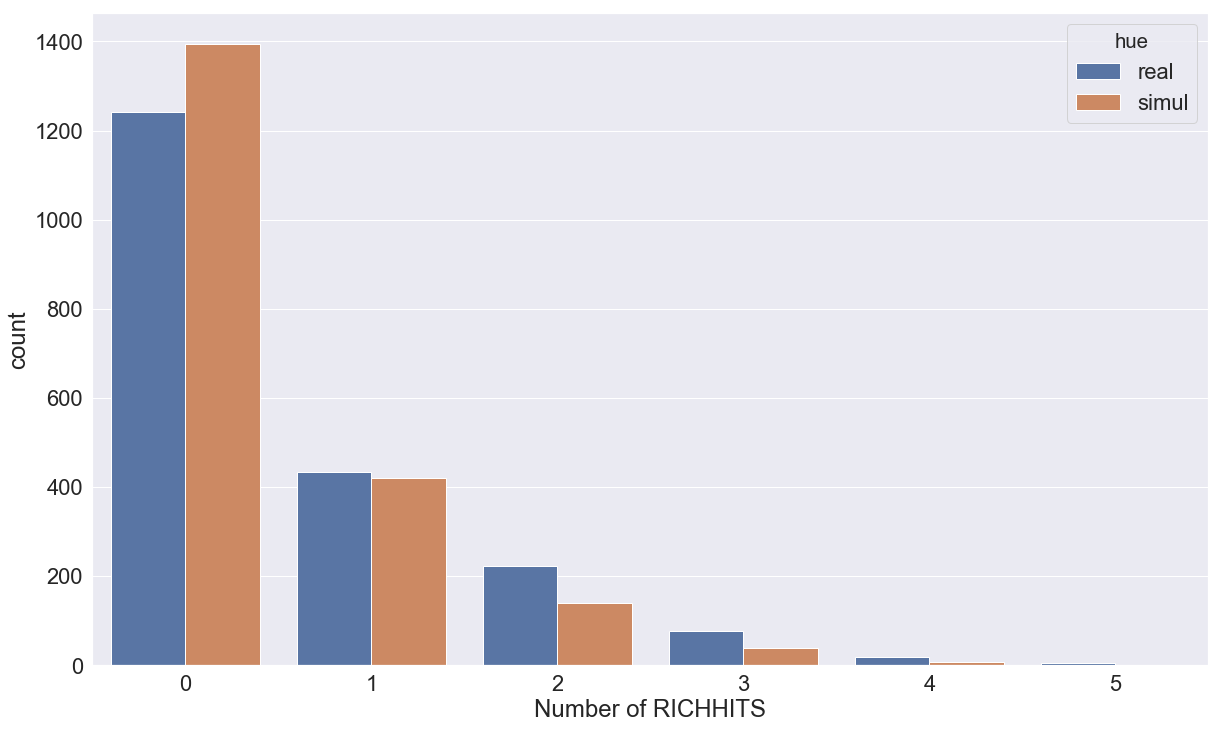

In [16]:
# 비교를 위해 실제, 가상 결과를 담을 DataFrame을 생성

pl_df_rich = pd.DataFrame(columns=['rich_count', 'hue'])
pl_df_rich['rich_count'] = pl_real_rich_count + pl_simul_rich_count
pl_df_rich['hue'] = ['real'] * 2000 + ['simul'] * 2000

# 실제, 가상의 각 게임당 RICHHITS 갯수 시각화

plt.figure(figsize=(20,12))
sns.countplot(x='rich_count', data=pl_df_rich, hue='hue')
plt.xlabel("Number of RICHHITS")
plt.show()

시각화 결과 시뮬레이션 데이터와 실제 데이터 사이에 어느정도 차이가 있는 것처럼 보인다는 것을 알 수 있습니다. 이 차이가 유의한지 여부를 확인하기 위해 카이제곱 적합도 검정을 사용합니다. 카이제곱 적합도 검정은 범주형 확률분포의 모수 $\mu=(\mu_1, \ldots, \mu_K)$에 대한 가설을 조사하는 검정 방법입니다. 원래 범주형 값 $k$가 나와야 할 횟수의 기댓값 $m_k$와 실제 나온 횟수 $x_k$의 차이를 이용하여 다음처럼 검정통계량을 구합니다.

$$
\begin{align}
\sum_{k=1}^K \dfrac{(x_k - m_k)^2}{m_k}
\end{align}
$$

###### Hypothesis test 1

귀무 가설과 대립 가설은 아래와 같습니다.

* H<sub>0</sub>: 시뮬레이션 결과는 실제 결과와 같다
* H<sub>1</sub>: 시뮬레이션 결과는 실제 결과와 다르다

테스트는 5% 유의 수준에서 수행되었습니다.

In [17]:
length = min(len(pd.Series(pl_real_rich_count).value_counts()), len(pd.Series(pl_simul_rich_count).value_counts()))

f_obs = list(pd.Series(pl_real_rich_count).value_counts())[:length]
f_exp = list(pd.Series(pl_simul_rich_count).value_counts())[:length]

st.chisquare(f_obs, f_exp=f_exp)

Power_divergenceResult(statistic=141.40021428361592, pvalue=9.015890735702169e-29)

p-value가 1.3912538539206486e-32로 유의수준 0.05보다 매우 작은 값이므로 기무가설을 기각하고 대립가설을 지지합니다.

---

### 1.3.2. 각 reel 마다 같은 symbol이 나오는 빈도 비교 <a name="platinum-1-3-2"></a>

각 reel은 3개의 칸으로 구성되어 있기 때문에  

1번 유형   | ●●● (모두 같음)  
2-1번 유형 | ●●○ (3번째만 다르고 나머지는 같음)  
2-2번 유형 | ●○● (2번째만 다르고 나머지는 같음)  
2-3번 유형 | ○●● (1번째만 다르고 나머지는 같음)  
3번 유형   | ●○⊙ (모두 다름)

다음과 같이 symbol이 겹치는 수에 따라 5개의 유형으로 구분지을 수 있습니다.

In [18]:
def getReelInfo(df, reel):
    row_type = []
    reel_symbols = []
    r_list = []
    s = ''
    for n, row in enumerate(df[df['col'] == reel]['classname']):
        r_list.append(row)
        s += row
        if not (n + 1) % 3:
            if r_list[0] == r_list [1] and r_list[1] == r_list[2]:
                row_type.append('1')
            elif r_list[0] == r_list[1] and r_list[0] != r_list[2] and r_list[1] != r_list[2]:
                row_type.append('2-1')
            elif r_list[0] == r_list[2] and r_list[0] != r_list[1] and r_list[2] != r_list[1]:
                row_type.append('2-2')
            elif r_list[1] == r_list[2] and r_list[1] != r_list[0] and r_list[2] != r_list[0]:
                row_type.append('2-3')
            else:
                row_type.append('3')
            r_list = []
            reel_symbols.append(s)
            s= ''
    return row_type, reel_symbols

In [19]:
# 실제 게임의 각 reel의 유형, symbol 저장

pl_real_reel1_rtype, pl_real_reel1_rsymbols = getReelInfo(pl_slot_result, 1)
pl_real_reel2_rtype, pl_real_reel2_rsymbols = getReelInfo(pl_slot_result, 2)
pl_real_reel3_rtype, pl_real_reel3_rsymbols = getReelInfo(pl_slot_result, 3)
pl_real_reel4_rtype, pl_real_reel4_rsymbols = getReelInfo(pl_slot_result, 4)
pl_real_reel5_rtype, pl_real_reel5_rsymbols = getReelInfo(pl_slot_result, 5)

pl_real_reel_rtype = pl_real_reel1_rtype + pl_real_reel2_rtype + pl_real_reel3_rtype+ pl_real_reel4_rtype + pl_real_reel5_rtype 


# 가상 게임의 각 reel의 유형, symbol 저장

pl_simul_reel1_rtype, pl_simul_reel1_rsymbols = getReelInfo(pl_simul_result, 1)
pl_simul_reel2_rtype, pl_simul_reel2_rsymbols = getReelInfo(pl_simul_result, 2)
pl_simul_reel3_rtype, pl_simul_reel3_rsymbols = getReelInfo(pl_simul_result, 3)
pl_simul_reel4_rtype, pl_simul_reel4_rsymbols = getReelInfo(pl_simul_result, 4)
pl_simul_reel5_rtype, pl_simul_reel5_rsymbols = getReelInfo(pl_simul_result, 5)

pl_simul_reel_rtype = pl_simul_reel1_rtype + pl_simul_reel2_rtype + pl_simul_reel3_rtype + pl_simul_reel4_rtype + pl_simul_reel5_rtype


# 비교를 위해 실제 게임 데이터의 reel_type을 담을 DataFrame을 생성

df_pl_rtype = pd.DataFrame(columns=['reel_type', 'reel_num', 'game_type'])
df_pl_rtype['reel_type'] = pl_real_reel_rtype + pl_simul_reel_rtype
df_pl_rtype['reel_num'] = (['reel_1'] * 2000 + ['reel_2'] * 2000 + ['reel_3'] * 2000 + ['reel_4'] * 2000 + ['reel_5'] * 2000) * 2
df_pl_rtype['game_type'] = ['real'] * 10000 + ['simul'] * 10000

df_pl_rtype.head()

,reel_type,reel_num,game_type
0,3,reel_1,real
1,3,reel_1,real
2,1,reel_1,real
3,3,reel_1,real
4,3,reel_1,real


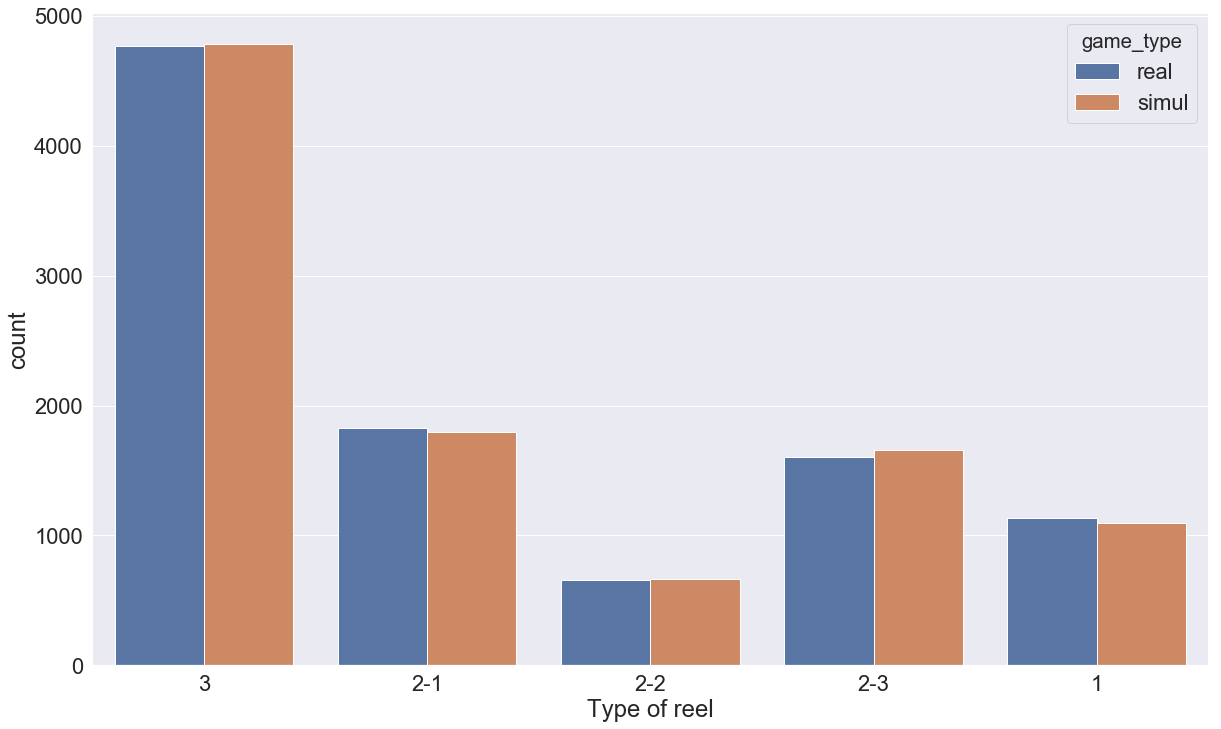

In [20]:
# 모든 reel의 reel_type 시각화

plt.figure(figsize=(20,12))
sns.countplot(x='reel_type', data=df_pl_rtype, order=['3', '2-1', '2-2', '2-3', '1'], hue='game_type')
plt.xlabel("Type of reel")
plt.show()

시각화 결과 시뮬레이션 결과와 실제 결과 사이에 큰 차이가 있음을 알 수 있습니다. 시뮬레이션의 모델처럼 모든 칸이 독립적이고 설정된 확률대로 Symbol이 등장하게 되면 한 개의 reel에서 3개가 모두 다를 확률(reel_type == 3)은 크고 (약 70%) 모두 같을 확률(reel_type == 1)은 매우 적지만 (약 1%) 실제 게임 결과에서는 3개가 모두 다를 확률은 시뮬레이션 결과보다 더 작고 모두 같을 확률은 훨씬 큰 것으로 나타납니다.

또한 2개가 같고 1개는 다른 유형(Type of reel 2-1, 2-2, 2-3)에서도 확률이 서로 같지 않고 다른 것을 확인할 수 있습니다.

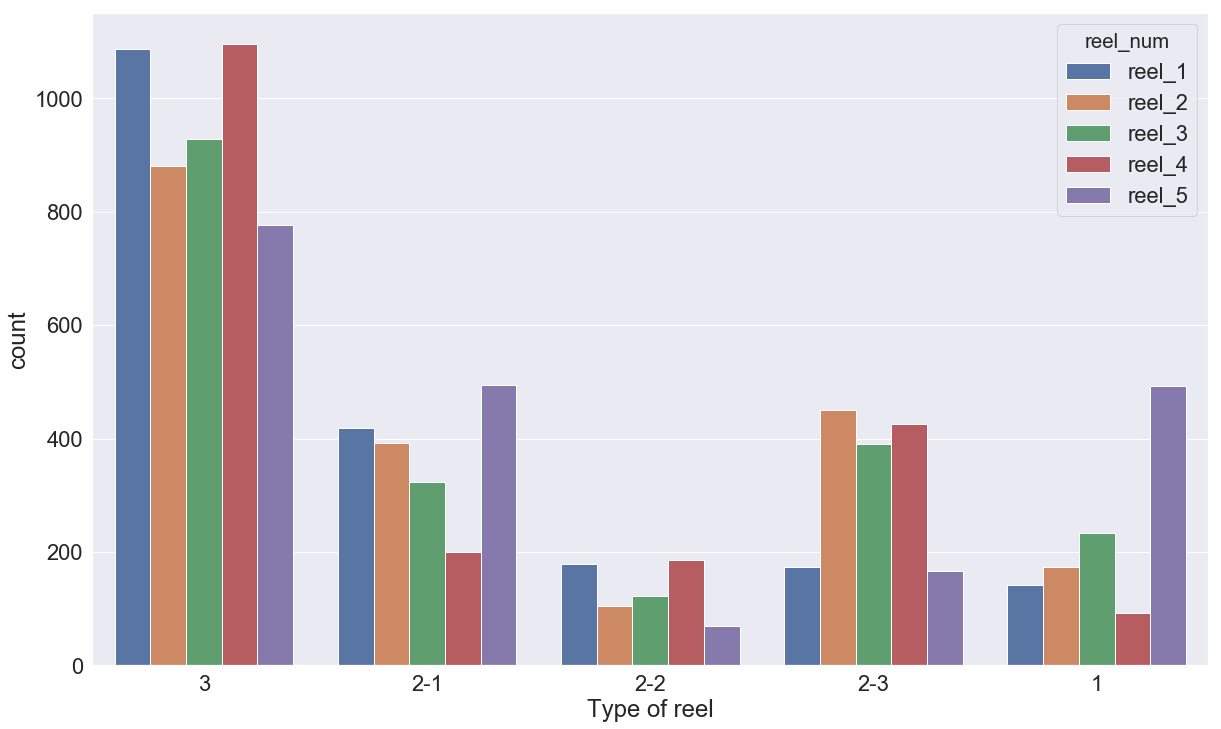

In [21]:
# 각 reel_num 별 reel_type 시각화

plt.figure(figsize=(20,12))
sns.countplot(x='reel_type', data=df_pl_rtype[df_pl_rtype['game_type']=='real'], hue='reel_num', order=['3', '2-1', '2-2', '2-3', '1'])
plt.xlabel("Type of reel")
plt.show()

5개의 reel 별로 시각화를 한 결과 reel에 따라서도 각 유형의 확률이 다른 것을 알 수 있습니다.

따라서 게임의 모델을 보완할 때 각 reel_type의 출현 확률, 각 reel별 확률을 고려할 필요가 있음을 알 수 있습니다.

---

### 1.3.3 한 번의 spin마다 등장하는 symbol의 개수 비교 <a name="platinum-1-3-3"></a>

In [22]:
# 실제 게임의 게임당 unique symbol의 개수를 담은 list를 생성

pl_real_unique_count = []

for i in range(2000):
    pl_real_unique_count.append(len(set(pl_slot_result_per_game[i])))


# 가상 게임의 게임당 unique symbol의 개수를 담은 list를 생성

pl_simul_unique_count = []

for i in range(2000):
    pl_simul_unique_count.append(len(set(pl_simul_result_per_game[i])))


# 실제 게임 데이터와 가상 게임 데이터 병합
df_pl_real_simul = pd.DataFrame(columns=['classname', 'game_type'])
df_pl_real_simul['classname'] = pd.concat([pl_slot_result['classname'], pl_simul_result['classname']])
df_pl_real_simul['game_type'] = ['real'] * len(pl_slot_result['classname']) + ['simul'] * len(pl_simul_result['classname'])
df_pl_real_simul = df_pl_real_simul.reset_index(drop=True)


# 비교를 위해 unique symbol의 실제, 가상 결과를 담을 DataFrame을 생성

df_pl_unique_count = pd.DataFrame(columns=['unique_count', 'game_type'])
df_pl_unique_count['unique_count'] = pl_real_unique_count + pl_simul_unique_count
df_pl_unique_count['game_type'] = ['real'] * len(pl_real_unique_count) + ['simul'] * len(pl_simul_unique_count)

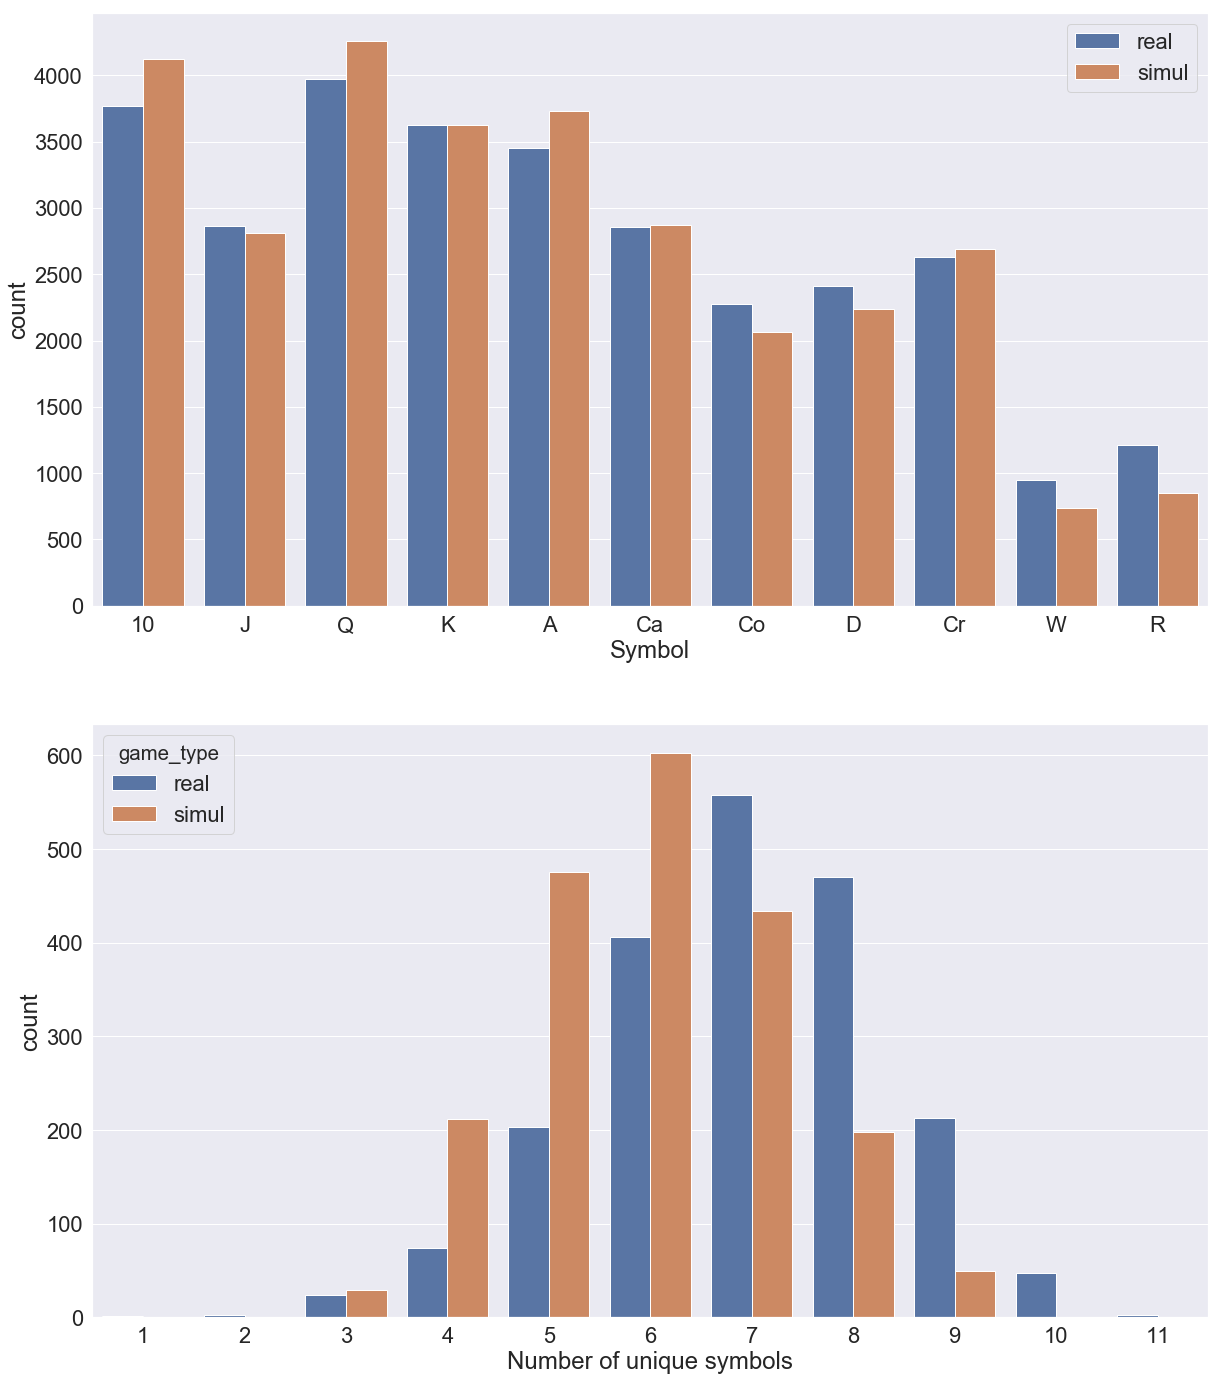

In [23]:
plt.figure(figsize=(20,24))
plt.subplot(2,1,1)
sns.countplot(x='classname', data=df_pl_real_simul, hue='game_type', order=pl_labels)
plt.xlabel('Symbol')

plt.legend()
plt.subplot(2,1,2)
sns.countplot(x='unique_count', data=df_pl_unique_count, hue='game_type')
plt.xlabel('Number of unique symbols')
plt.show()

우선 각 게임의 고유한 Symbol 개수를 알아보기 전에, 실제 게임 데이터의 Symbol별 등장 확률과 가상 게임 데이터의 등장 확률이 같은 지를 확인해보겠습니다. 이 차이가 유의한지 여부를 확인하기 위해 카이제곱 적합도 검정을 사용합니다.

###### Hypothesis test 3

귀무 가설과 대립 가설은 아래와 같습니다.

* H<sub>0</sub>: 시뮬레이션 결과는 실제 결과와 같다
* H<sub>1</sub>: 시뮬레이션 결과는 실제 결과와 다르다

테스트는 5% 유의 수준에서 수행되었습니다.

In [24]:
f_obs = list(pl_slot_result['classname'].value_counts().sort_index())
f_exp = list(pl_simul_result['classname'].value_counts().sort_index())

st.chisquare(f_obs, f_exp=f_exp)

Power_divergenceResult(statistic=328.37164579917555, pvalue=1.5373728723537347e-64)

p-value가 ??로 유의수준 0.05보다 큰 값이므로 귀무가설을 지지합니다. 이처럼 실제 결과와 시뮬레이션 결과의 Symbol 등장 횟수는 차이가 없다고 볼 수 있지만 두번째 시각화 그래프를 보면 가상 게임 데이터는 실제 게임 데이터에 비해 오른쪽으로 치우쳐있는 것을 볼 수 있습니다.
즉 위의 2개의 그래프는 실제 게임에서는 시뮬레이션 게임에 비에서 Symbol이 같은 것끼리 몰아서 나오는 경향을 가지고 있다는 것을 의미합니다.

---

### 1.3.4 획득한 reward 금액과 payline의 길이(x3, x4, x5) 비교 <a name="platinum-1-3-4"></a>

In [25]:
# 비교에 필요한 함수 생성

pl_paytable = pd.read_csv('../data/slot_machine/platinum_csv/pl_paytable.csv')
pl_paylines = [[1, 4, 7, 10, 13],
             [0, 3, 6, 9, 12],
             [2, 5, 8, 11, 14],
             [0, 4, 8, 10, 12],
             [2, 4, 6, 10, 14],
             [0, 3, 7, 11, 14],
             [2, 5, 7, 9, 12],
             [1, 5, 8, 11, 13],
             [1, 3, 6, 9, 13],
             [0, 4, 7, 10, 12],
             [2, 4, 7, 10, 14],
             [0, 4, 6, 10, 12],
             [2, 4, 8, 10, 14],
             [1, 4, 6, 10, 13],
             [1, 4, 8, 10, 13],
             [1, 5, 7, 9, 13],
             [1, 3, 7, 11, 13],
             [0, 5, 6, 11, 12],
             [2, 3, 8, 9, 14],
             [1, 3, 8, 9, 13],
             [1, 5, 6, 11, 13],
             [0, 3, 8, 9, 12],
             [2, 5, 6, 11, 14],
             [0, 5, 8, 11, 12],
             [2, 3, 6, 9, 14],
             [0, 3, 7, 9, 12],
             [2, 5, 7, 11, 14],
             [0, 4, 8, 11, 14],
             [2, 4, 6, 9, 12],
             [1, 3, 7, 9, 13]]

def get_platinum_payline_symbol(lst):
    if len(set(lst)) < 2:
        return lst[0]
    else:
        for x in list(set(lst)):
            if x != 'W':
                return x
            else:
                continue

def richCheck(game, bpl):
    rnum = game.count('R')
    if rnum <= 2:
        return 0
    elif rnum == 3:
        return bpl * 30
    elif rnum == 4:
        return bpl * 90
    elif rnum == 5:
        return bpl * 240
    elif rnum == 6:
        return bpl * 900
    elif rnum == 7:
        return bpl * 2250
    elif rnum == 8:
        return bpl * 15000
    elif rnum == 9:
        return bpl * 30000

def calPlatinumPayline(game, bpl):
    pay = 0
    r_acc = 0
    pay_type_list = []
    
    # RICH 보너스 계산
    pay += richCheck(game, bpl)
    r_acc += game.count('R')
    
    # payline 계산
    for payline in pl_paylines:
        tmp = []
        for i in range(5):
            if i == 4:
                tmp.append(game[payline[i]])
                break
            if i == 0 and game[payline[i]] == 'W':
                tmp.append(game[payline[i]])
            elif game[payline[i]] != game[payline[i+1]] and game[payline[i+1]] != 'W':
                tmp.append(game[payline[i]])
                break
            else:
                tmp.append(game[payline[i]])

        if len(tmp) >= 3:
            sym = get_platinum_payline_symbol(tmp)
            pay += pl_paytable.loc[len(tmp)-3, sym] * bpl
            pay_type_list.append(tmp)
    
    return pay, pay_type_list

Platinum Real game hit probability :  38.55
Platinum Real Average Reward :  34503.0 

Platinum Simulation game hit probability :  58.05
Platinum Simulation Average Reward :  39543.0


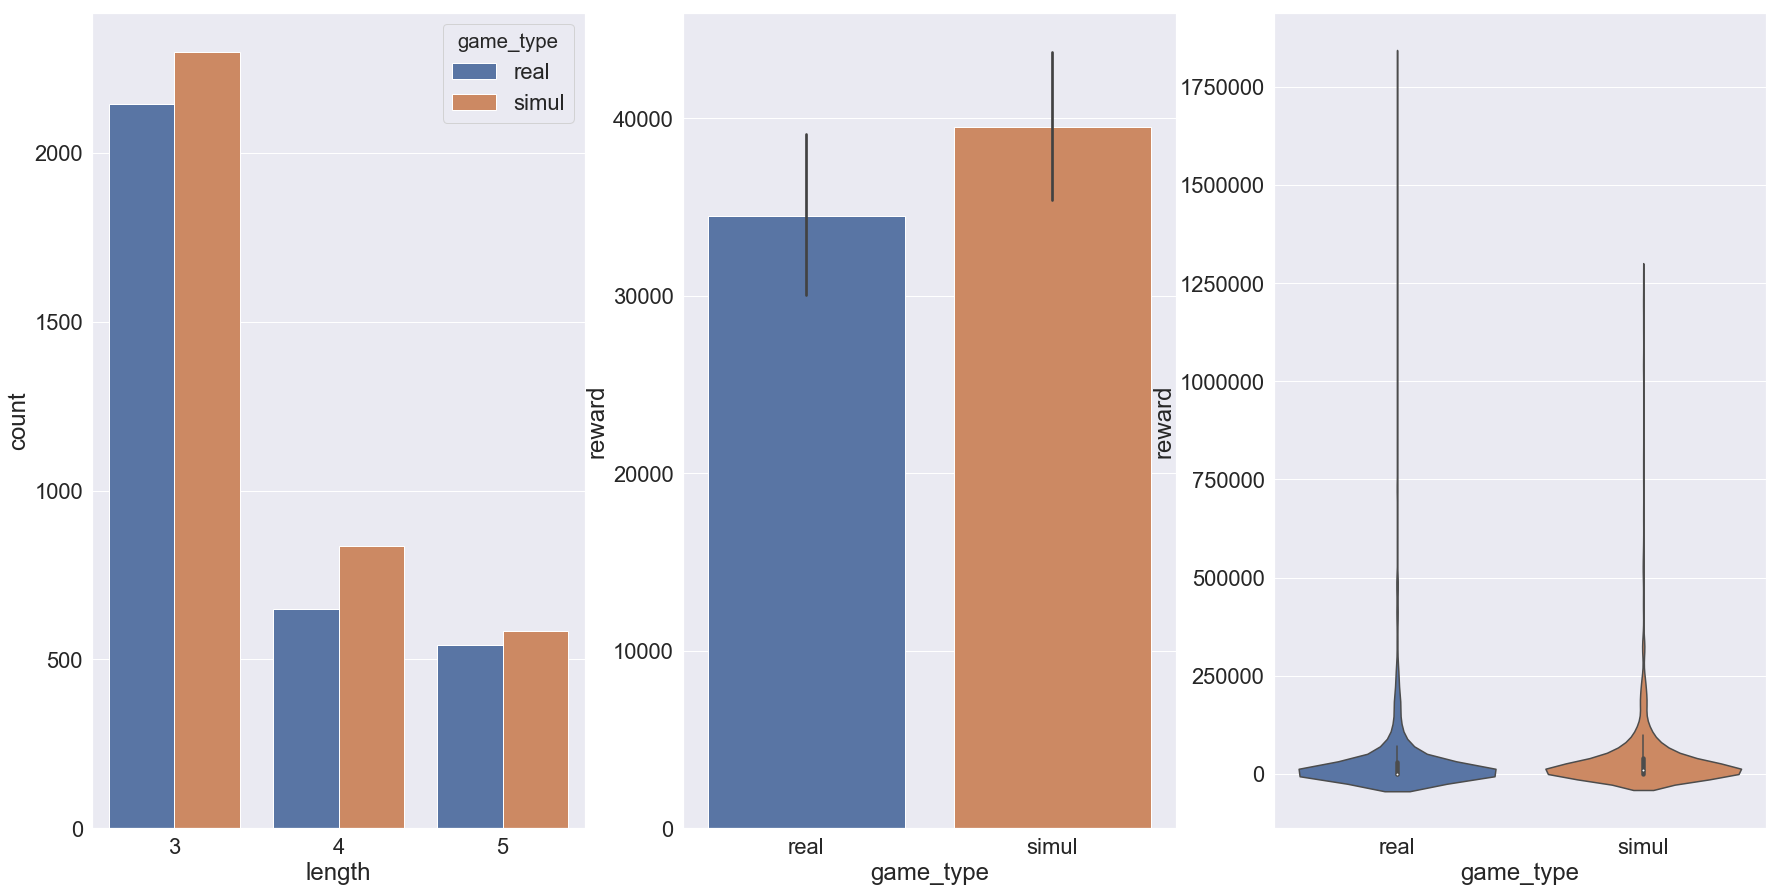

In [26]:
# 게임당 당첨 금액과 당첨된 Symbol의 종류를 담을 list 생성

pl_real_pay_list, pl_real_pay_type_list, pl_real_payline_num = [], [], []
pl_simul_pay_list, pl_simul_pay_type_list, pl_simul_payline_num = [], [], []

for real_game in pl_slot_result_per_game:
    pl_real_pay_list.append(calPlatinumPayline(real_game, 2000)[0])
    pl_real_pay_type_list.extend(calPlatinumPayline(real_game, 2000)[1])

for simul_game in pl_simul_result_per_game:
    pl_simul_pay_list.append(calPlatinumPayline(simul_game, 2000)[0])
    pl_simul_pay_type_list.extend(calPlatinumPayline(simul_game, 2000)[1])


# 당첨된 payline의 length를 담을 list 생성

pl_real_payline_length = [len(pay_type) for pay_type in pl_real_pay_type_list]
pl_simul_payline_length = [len(pay_type) for pay_type in pl_simul_pay_type_list]


# 시각화를 위한 DataFrame 생성

df_pl_pay_list = pd.DataFrame(columns=['reward', 'game_type'])
df_pl_pay_list['reward'] = pl_real_pay_list + pl_simul_pay_list
df_pl_pay_list['game_type'] = ['real'] * 2000 + ['simul']*2000


df_pl_payline_length = pd.DataFrame(columns=['length', 'game_type'])
df_pl_payline_length['length'] = pl_real_payline_length + pl_simul_payline_length
df_pl_payline_length['game_type'] = ['real'] * len(pl_real_payline_length) + ['simul'] * len(pl_simul_payline_length)

df_pl_all_payline = pd.DataFrame(columns=['payline_num', 'game_type'])
df_pl_all_payline['payline_num'] = pl_real_payline_num + pl_simul_payline_num
df_pl_all_payline['game_type'] = ['real'] * len(pl_real_payline_num) + ['simul'] * len(pl_simul_payline_num)


# 게임 유형별 hit probability, average reward 출력

print('Platinum Real game hit probability : ', round(len([pay for pay in pl_real_pay_list if not pay == 0])/len(pl_real_pay_list)*100,2))
print('Platinum Real Average Reward : ', sum(pl_real_pay_list) / len(pl_real_pay_list),'\n')

print('Platinum Simulation game hit probability : ', round(len([pay for pay in pl_simul_pay_list if not pay == 0])/len(pl_simul_pay_list)*100,2))
print('Platinum Simulation Average Reward : ', sum(pl_simul_pay_list) / len(pl_simul_pay_list))



## 시각화 ##


# 3 x 2 sub plots 생성
gs = gridspec.GridSpec(1, 3)
plt.figure(figsize=(30,15))

# 게임 유형별 reward 빈도 시각화
ax = plt.subplot(gs[0, 0])
sns.countplot(x='length', data=df_pl_payline_length, hue='game_type')


# 게임 유형별 average reward 시각화
ax = plt.subplot(gs[0, 1])
sns.barplot(x='game_type', y='reward', data=df_pl_pay_list)


# payline length 시각화
ax = plt.subplot(gs[0, 2])
sns.violinplot(x='game_type', y='reward', data=df_pl_pay_list)



우선 **첫번째 그래프**를 보면 reward를 획득한 payline의 길이(x3, x4, x5)에서 큰 차이를 보입니다. 이는 위의 시각화에서 보았듯이, Simulation 게임에서 한 게임에서 등장하는 같은 symbol의 수가 실제 게임에 비해 적기 때문에 당첨된 payline의 수가 적어져서 위와 같은 결과를 나타내는 것으로 보입니다. 또 주목해야 할 것은 x4의 count와 x5의 count의 차이가 그다지 크지 않은 것을 알 수 있습니다.

**두번째 그래프**를 보면, 첫번째 그래프에서 보았듯이 당첨된 payline의 수가 적어서 보너스 게임을 제외한 RTP가 실제 게임(약 57.5%)에 비해 시뮬레이션 게임(약 12.4%)이 크게 떨어지는 것을 알 수 있습니다.

**세번째 그래프**를 보면 큰 금액을 주는 x4, x5 payline의 수가 상대적으로 적어서 실제 데이터가 위로 긴 꼬리를 가지고 있는 반면 시뮬레이션 데이터는 짧은 꼬리를 가지고 있습니다.

---

# 2. Monster Slot <a name="monster-2"></a>

In [27]:
ms_labels = ['10', 'J', 'Q', 'K', 'A', 'GGM', 'OM', 'RM', 'GWM', 'W', 'S']

In [28]:
# csv 파일 불러오기

ms_slot_result = pd.read_csv('../data/slot_machine/monster_csv/ms_all.csv')
ms_slot_result.head(15)

,img,classname
0,monster_0_0.jpg,OM
1,monster_0_1.jpg,W
2,monster_0_2.jpg,A
3,monster_0_3.jpg,A
4,monster_0_4.jpg,Q
5,monster_0_5.jpg,GWM
6,monster_0_6.jpg,OM
7,monster_0_7.jpg,10
8,monster_0_8.jpg,J
9,monster_0_9.jpg,GGM


In [29]:
# 각 칸의 결과마다 game, row, col column 생성

ms_slot_result_game = [int(i_name.split('_')[1]) for n, i_name in enumerate(ms_slot_result['img'])]
ms_slot_result_row = [int(i_name.split('_')[2].split('.')[0]) % 3 + 1 for n, i_name in enumerate(ms_slot_result['img'])]
ms_slot_result_col = [int(i_name.split('_')[2].split('.')[0]) // 3 + 1 for n, i_name in enumerate(ms_slot_result['img'])]

ms_slot_result['game'] = ms_slot_result_game
ms_slot_result['row'] = ms_slot_result_row
ms_slot_result['col'] = ms_slot_result_col

ms_slot_result.head(15)

,img,classname,game,row,col
0,monster_0_0.jpg,OM,0,1,1
1,monster_0_1.jpg,W,0,2,1
2,monster_0_2.jpg,A,0,3,1
3,monster_0_3.jpg,A,0,1,2
4,monster_0_4.jpg,Q,0,2,2
5,monster_0_5.jpg,GWM,0,3,2
6,monster_0_6.jpg,OM,0,1,3
7,monster_0_7.jpg,10,0,2,3
8,monster_0_8.jpg,J,0,3,3
9,monster_0_9.jpg,GGM,0,1,4


In [30]:
tmp = []
ms_slot_result_per_game = []
for n, x in enumerate(ms_slot_result['classname']):
    tmp.append(x)
    if (n+1) % 15 == 0:
        ms_slot_result_per_game.append(tmp)
        tmp = []

---

## 2.1 각 Symbol의 출현 빈도 확인 <a name="monster-2-1"></a>

In [31]:
# 각 Symbol의 출현 확률의 구체적인 수치

ms_slot_result['classname'].value_counts() / len(ms_slot_result) * 100

Q      14.126667
K      13.960000
10     13.136667
A      12.740000
J      12.003333
GGM     9.553333
OM      7.376667
RM      6.440000
S       4.786667
GWM     4.393333
W       1.483333
Name: classname, dtype: float64

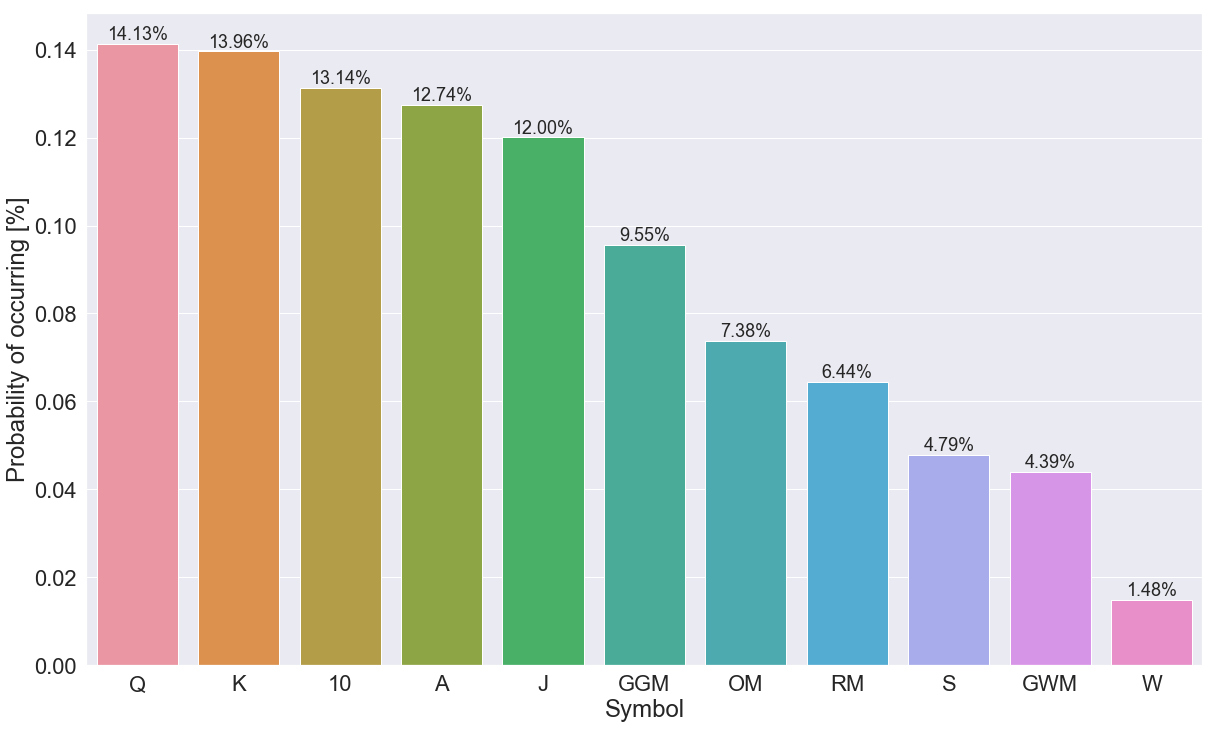

In [32]:
# 각 Symbol의 출현 확률 시각화

plt.figure(figsize=(20,12))
ax = sns.barplot(x=ms_slot_result['classname'].value_counts().index, y=ms_slot_result['classname'].value_counts() / len(ms_slot_result))
plt.xlabel("Symbol")
plt.ylabel("Probability of occurring [%]")


for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2f}%'.format(y*100), (x.mean(), y), ha='center', va='bottom', fontsize=18) # set the alignment of the text

plt.show()

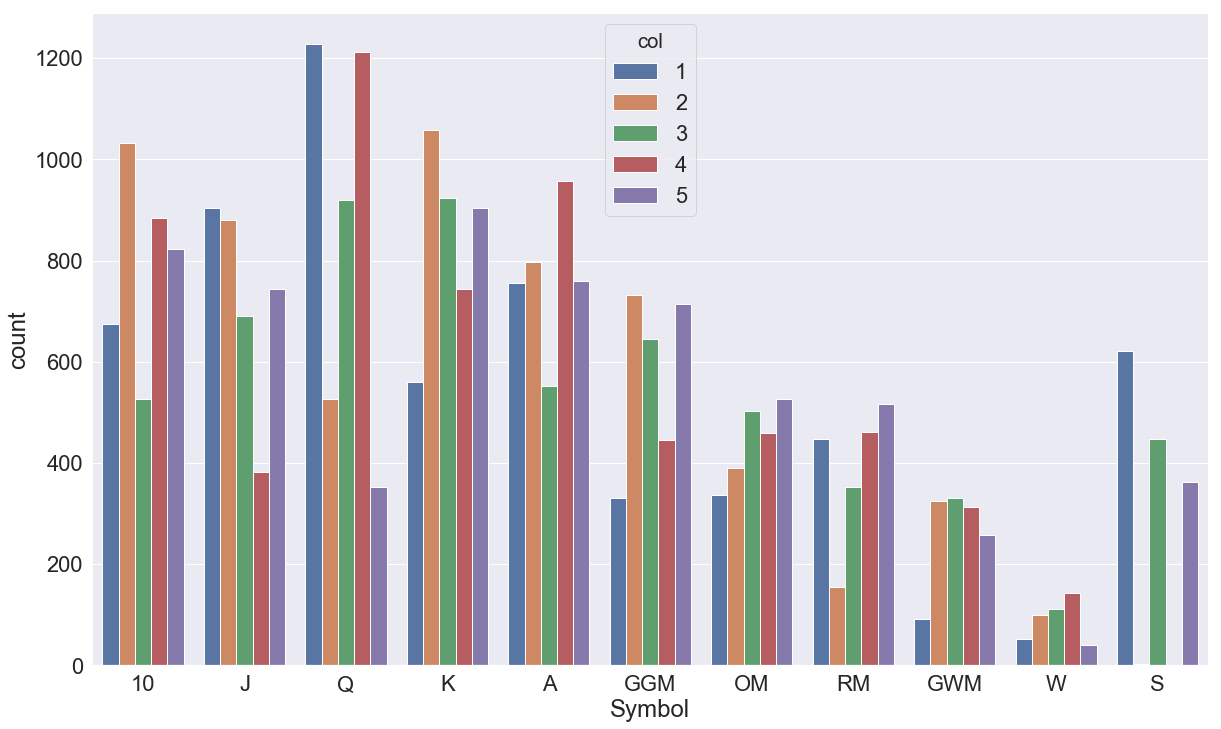

In [33]:
# 각 reel별 출현 횟수 시각화

plt.figure(figsize=(20,12))
sns.countplot(x='classname', data=ms_slot_result, hue='col', order=ms_labels)
plt.xlabel("Symbol")
plt.show()

---

## 2.2 Simulation 데이터 생성 <a name="monster-2-2"></a>

In [34]:
'''
# Baseline Model

Monster Slot 2000번의 실제 게임 데이터를 기반으로 각 Symbol의 출현 빈도 설정 (근사치)

# Q   : 14 %
# K   : 14 %
# 10  : 13 %
# A   : 12.5 %
# J   : 12 %
# GGM : 9.5 %
# OM  : 7.5 %
# RM  : 6.5 %
# S   : 5 %
# GWM : 4.5 %
# W   : 1.5 %
'''

# numpy의 randint를 통해 출현 확률을 기반으로 Symbol을 Return하는 함수

def getMonsterSymbol(start, end):
    i = np.random.randint(start, end)
    if i <= 28:
        return 'Q'
    elif i <= 56 and i > 28:
        return 'K'
    elif i <= 82 and i > 56:
        return '10'
    elif i <= 107 and i > 82:
        return 'A'
    elif i <= 131 and i > 107:
        return 'J'
    elif i <= 150 and i > 131:
        return 'GGM'
    elif i <= 165 and i > 150:
        return 'OM'
    elif i <= 178 and i > 165:
        return 'RM'
    elif i <= 187 and i > 178:
        return 'GWM'
    elif i <= 190 and i > 187:
        return 'W'
    elif i > 190:
        return 'S'

# 1회의 Spin 실행을 구현한 함수

def spin_monster():
    game = []
    start = 1
    
    for i in range(15):
        # 각 15개의 칸에 Symbol 추가
        if i%6 <= 2 and game.count('S') < ((i//6) + 1):
            end = 201
            game.append(getMonsterSymbol(start, end))
        else:
            end = 191
            game.append(getMonsterSymbol(start, end))

    return game

In [35]:
# 실행 결과를 담을 list
ms_simul_result_per_game = []

# 2000번의 게임을 실행
for i in range(2000):
    ms_simul_result_per_game.append(spin_monster())

# 실제 게임 플레이 DataFrame을 불러와서 가상 게임플레이 데이터로 변경

ms_simul_result = ms_slot_result[['classname', 'game', 'row', 'col']]

ms_simul_classname = []

for game in ms_simul_result_per_game:
    for x in game:
        ms_simul_classname.append(x)

ms_simul_result['classname'] = ms_simul_classname

ms_simul_result.head(15)

C:\Users\Lee\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,classname,game,row,col
0,GWM,0,1,1
1,K,0,2,1
2,RM,0,3,1
3,W,0,1,2
4,J,0,2,2
5,OM,0,3,2
6,K,0,1,3
7,10,0,2,3
8,K,0,3,3
9,10,0,1,4


---

## 2.3 Monster Slot 시각화 <a name="monster-2-3"></a>

### 2.3.1 SCATTER 비교 <a name="monster-2-3-1"></a>

In [36]:
# 실제 게임의 게임당 SCATTER 출현 횟수를 담은 list를 생성

ms_real_scatter_count =  []
for game in ms_slot_result_per_game:
    ms_real_scatter_count.append(game.count('S'))

# 실제 게임의 Spin당 RICHHITS의 출현 갯수

print('# 실제 플레이 데이터의 각 Spin당 SCATTER의 등장 개수')
pd.Series(ms_real_scatter_count).value_counts()

# 실제 플레이 데이터의 각 Spin당 SCATTER의 등장 개수


0    865
1    862
2    245
3     28
dtype: int64

In [37]:
# 가상 게임의 게임당 SCATTER 출현 횟수를 담은 list를 생성

ms_simul_scatter_count = []
for game in ms_simul_result_per_game:
    ms_simul_scatter_count.append(game.count('S'))

# 가상 게임의 Spin당 RICHHITS의 출현 갯수

pd.Series(ms_simul_scatter_count).value_counts()

0    1281
1     588
2     118
3      13
dtype: int64

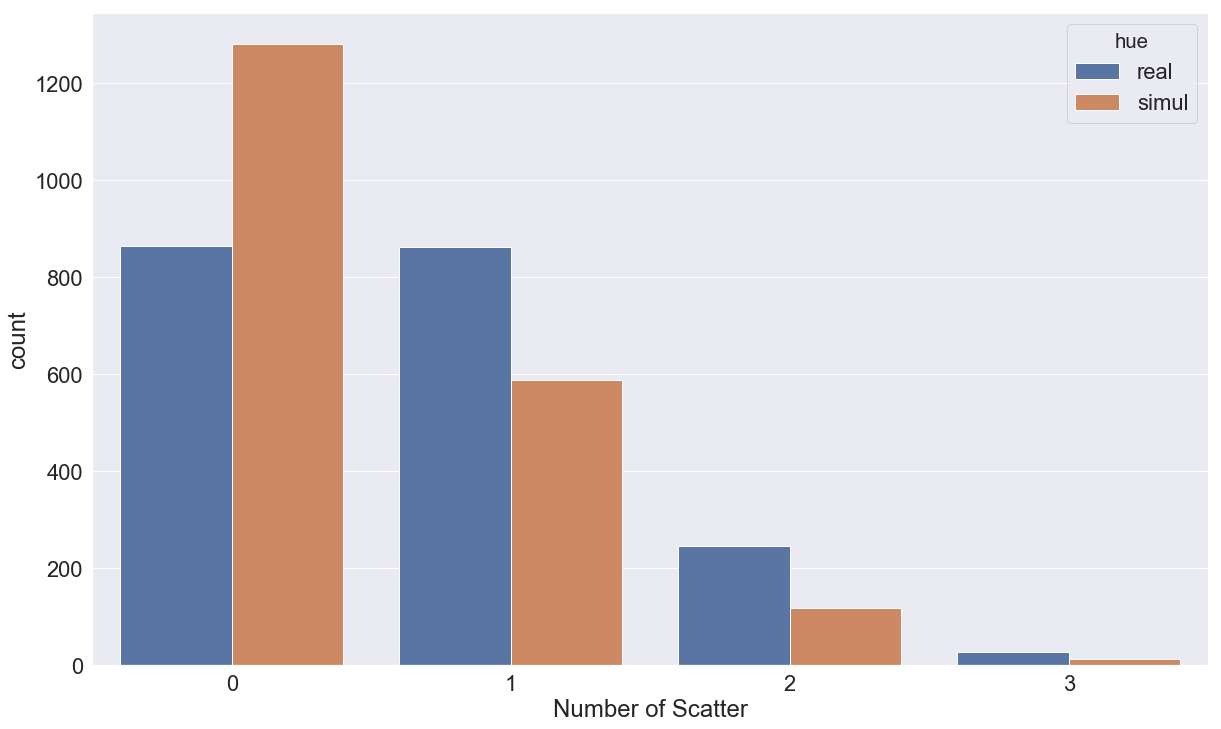

In [38]:
# 비교를 위해 실제, 가상 결과를 담을 DataFrame을 생성

df_ms_scatter = pd.DataFrame(columns=['scatter_count', 'hue'])
df_ms_scatter['scatter_count'] = ms_real_scatter_count + ms_simul_scatter_count
df_ms_scatter['hue'] = ['real'] * 2000 + ['simul'] * 2000

# 실제, 가상의 각 게임당 RICHHITS 갯수 시각화

plt.figure(figsize=(20,12))
sns.countplot(x='scatter_count', data=df_ms_scatter, hue='hue')
plt.xlabel("Number of Scatter")
plt.show()

---

### 2.3.2 각 reel 마다 같은 symbol이 나오는 빈도 비교 <a name="monster-2-3-2"></a>

In [39]:
def getReelInfo(df, reel):
    row_type = []
    reel_symbols = []
    r_list = []
    s = ''
    for n, row in enumerate(df[df['col'] == reel]['classname']):
        r_list.append(row)
        s += row
        if not (n + 1) % 3:
            if r_list[0] == r_list [1] and r_list[1] == r_list[2]:
                row_type.append('1')
            elif r_list[0] == r_list[1] and r_list[0] != r_list[2] and r_list[1] != r_list[2]:
                row_type.append('2-1')
            elif r_list[0] == r_list[2] and r_list[0] != r_list[1] and r_list[2] != r_list[1]:
                row_type.append('2-2')
            elif r_list[1] == r_list[2] and r_list[1] != r_list[0] and r_list[2] != r_list[0]:
                row_type.append('2-3')
            else:
                row_type.append('3')
            r_list = []
            reel_symbols.append(s)
            s= ''
    return row_type, reel_symbols

In [40]:
# 실제 게임의 각 reel의 유형, symbol 저장

ms_real_reel1_rtype, ms_real_reel1_rsymbols = getReelInfo(ms_slot_result, 1)
ms_real_reel2_rtype, ms_real_reel2_rsymbols = getReelInfo(ms_slot_result, 2)
ms_real_reel3_rtype, ms_real_reel3_rsymbols = getReelInfo(ms_slot_result, 3)
ms_real_reel4_rtype, ms_real_reel4_rsymbols = getReelInfo(ms_slot_result, 4)
ms_real_reel5_rtype, ms_real_reel5_rsymbols = getReelInfo(ms_slot_result, 5)

ms_real_reel_rtype = ms_real_reel1_rtype + ms_real_reel2_rtype + ms_real_reel3_rtype + ms_real_reel4_rtype + ms_real_reel5_rtype

# 가상 게임의 각 reel의 유형, symbol 저장

ms_simul_reel1_rtype, ms_simul_reel1_rsymbols = getReelInfo(ms_simul_result, 1)
ms_simul_reel2_rtype, ms_simul_reel2_rsymbols = getReelInfo(ms_simul_result, 2)
ms_simul_reel3_rtype, ms_simul_reel3_rsymbols = getReelInfo(ms_simul_result, 3)
ms_simul_reel4_rtype, ms_simul_reel4_rsymbols = getReelInfo(ms_simul_result, 4)
ms_simul_reel5_rtype, ms_simul_reel5_rsymbols = getReelInfo(ms_simul_result, 5)

ms_simul_reel_rtype = ms_simul_reel1_rtype + ms_simul_reel2_rtype + ms_simul_reel3_rtype + ms_simul_reel4_rtype + ms_simul_reel5_rtype

# 비교를 위해 실제 게임 데이터의 reel_type을 담을 DataFrame을 생성

df_ms_rtype = pd.DataFrame(columns=['reel_type', 'reel_num', 'game_type'])
df_ms_rtype['reel_type'] = ms_real_reel_rtype + ms_simul_reel_rtype
df_ms_rtype['reel_num'] = (['reel_1'] * 2000 + ['reel_2'] * 2000 + ['reel_3'] * 2000 + ['reel_4'] * 2000 + ['reel_5'] * 2000) * 2
df_ms_rtype['game_type'] = ['real'] * 10000 + ['simul'] * 10000

df_ms_rtype.head(15)

,reel_type,reel_num,game_type
0,3,reel_1,real
1,2-3,reel_1,real
2,3,reel_1,real
3,2-1,reel_1,real
4,3,reel_1,real
5,3,reel_1,real
6,1,reel_1,real
7,1,reel_1,real
8,3,reel_1,real
9,3,reel_1,real


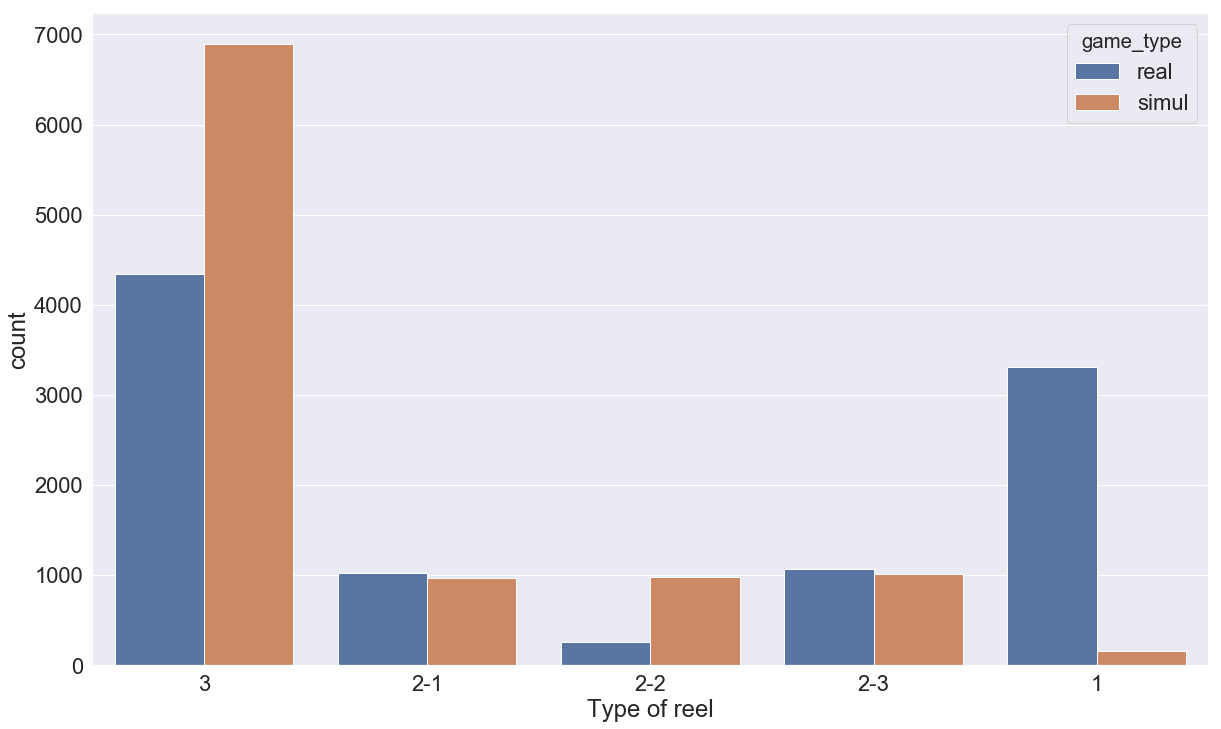

In [41]:
# 모든 reel의 reel_type 시각화

plt.figure(figsize=(20,12))
sns.countplot(x='reel_type', data=df_ms_rtype, order=['3', '2-1', '2-2', '2-3', '1'], hue='game_type')
plt.xlabel("Type of reel")
plt.show()

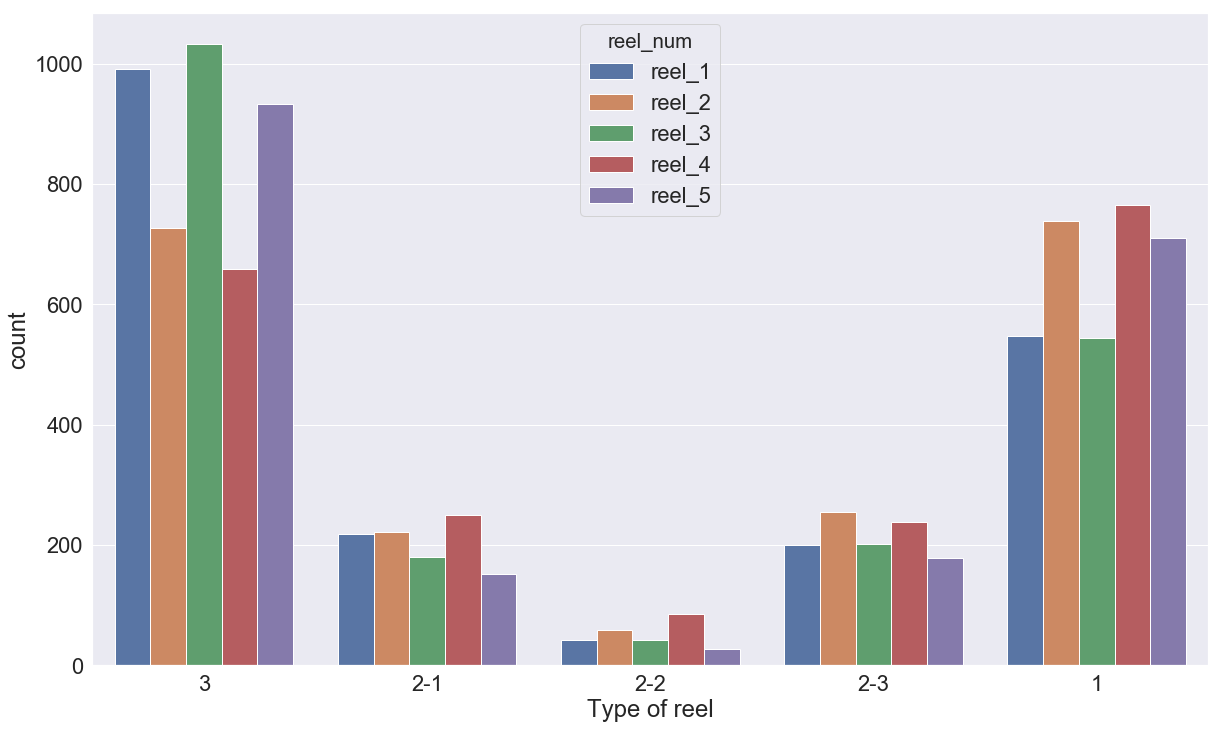

In [42]:
# 각 reel_num 별 reel_type 시각화

plt.figure(figsize=(20,12))
sns.countplot(x='reel_type', data=df_ms_rtype[df_ms_rtype['game_type']=='real'], hue='reel_num', order=['3', '2-1', '2-2', '2-3', '1'])
plt.xlabel("Type of reel")
plt.show()

---

### 2.3.3 한 번의 spin마다 등장하는 symbol의 개수 비교 <a name="monster-2-3-3"></a>

In [43]:
# 실제 게임의 게임당 unique symbol의 개수를 담은 list를 생성

ms_real_unique_count = []

for i in range(2000):
    ms_real_unique_count.append(len(set(ms_slot_result_per_game[i])))


# 가상 게임의 게임당 unique symbol의 개수를 담은 list를 생성

ms_simul_unique_count = []

for i in range(2000):
    ms_simul_unique_count.append(len(set(ms_simul_result_per_game[i])))


# 실제 게임 데이터와 가상 게임 데이터 병합

df_ms_real_simul = pd.DataFrame(columns=['classname', 'game_type'])
df_ms_real_simul['classname'] = pd.concat([ms_slot_result['classname'], ms_simul_result['classname']])
df_ms_real_simul['game_type'] = ['real'] * len(ms_slot_result['classname']) + ['simul'] * len(ms_simul_result['classname'])
df_ms_real_simul = df_ms_real_simul.reset_index(drop=True)

# 비교를 위해 실제, 가상 결과를 담을 DataFrame을 생성

df_ms_unique_count = pd.DataFrame(columns=['unique_count', 'game_type'])
df_ms_unique_count['unique_count'] = ms_real_unique_count + ms_simul_unique_count
df_ms_unique_count['game_type'] = ['real'] * len(ms_real_unique_count) + ['simul'] * len(ms_simul_unique_count)

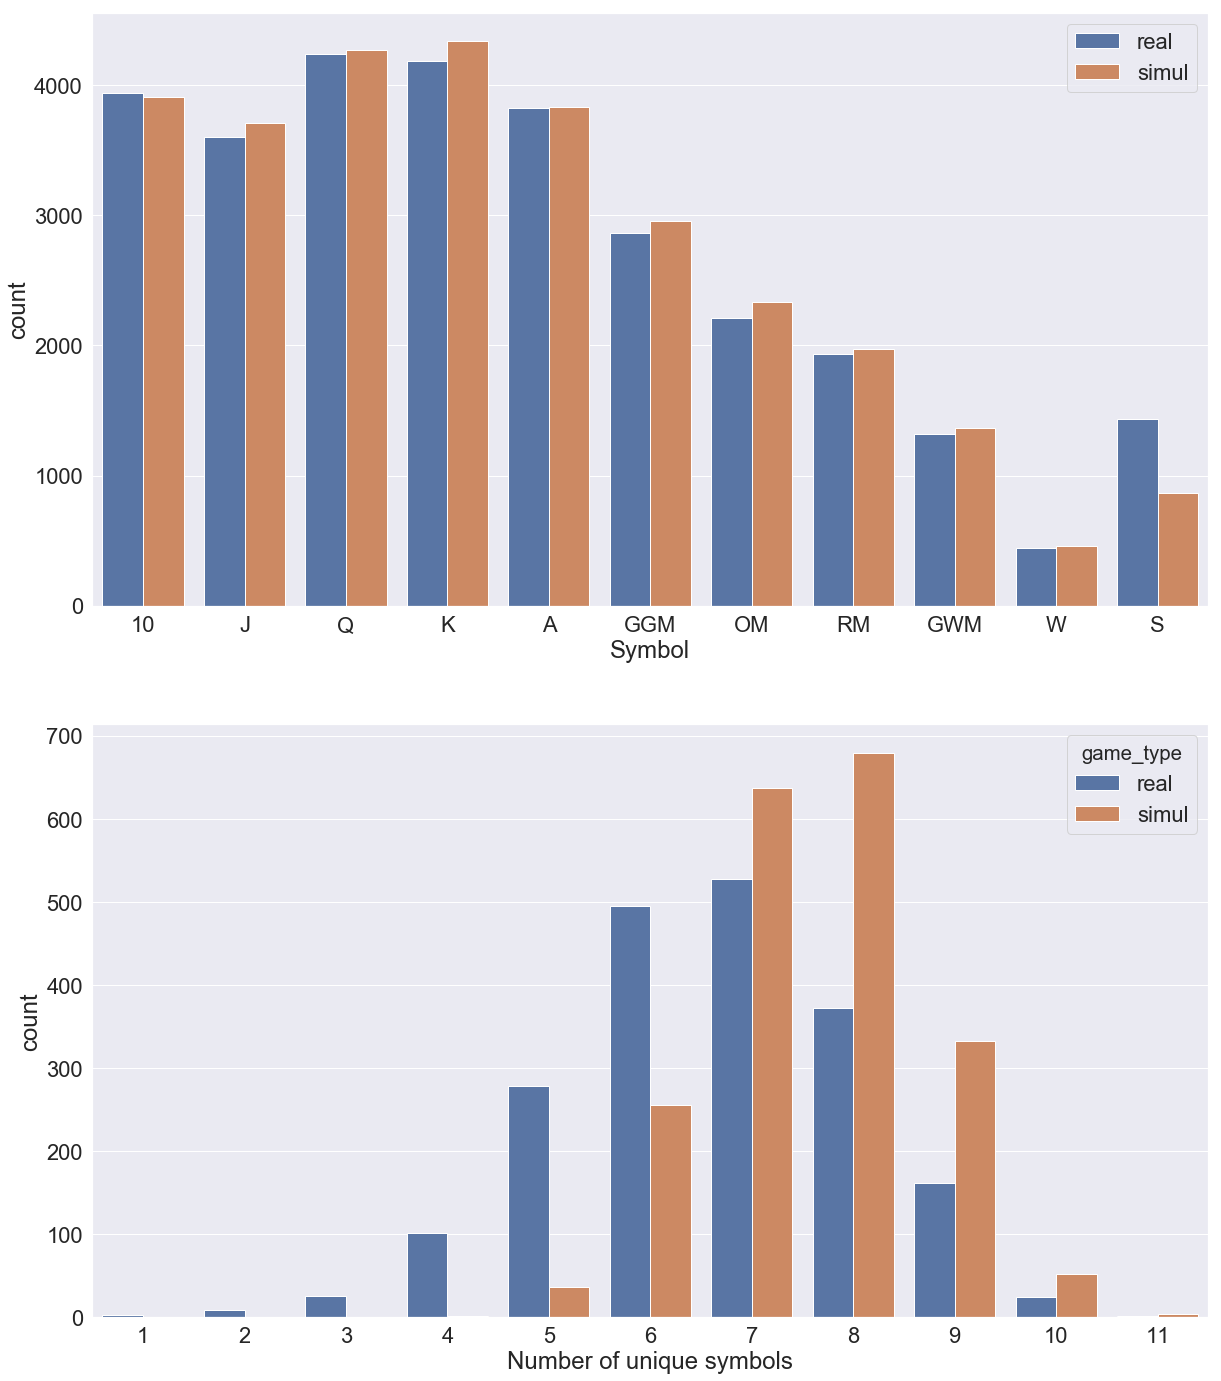

In [44]:
plt.figure(figsize=(20,24))
plt.subplot(2,1,1)
sns.countplot(x='classname', data=df_ms_real_simul, hue='game_type', order=ms_labels)
plt.xlabel('Symbol')

plt.legend()
plt.subplot(2,1,2)
sns.countplot(x='unique_count', data=df_ms_unique_count, hue='game_type')
plt.xlabel('Number of unique symbols')
plt.show()

---

### 2.3.4 획득한 reward 금액과 payline의 길이(x3, x4, x5) 비교 <a name="monster-2-3-4"></a>

In [45]:
# 비교에 필요한 함수 생성

ms_paytable = pd.read_csv('../data/slot_machine/monster_csv/ms_paytable.csv')
ms_paylines = [[1, 4, 7, 10, 13],
             [0, 3, 6, 9, 12],
             [2, 5, 8, 11, 14],
             [0, 4, 8, 10, 12],
             [2, 4, 6, 10, 14],
             [0, 3, 7, 11, 14],
             [2, 5, 7, 9, 12],
             [1, 5, 8, 11, 13],
             [1, 3, 6, 9, 13],
             [0, 4, 7, 10, 12],
             [2, 4, 7, 10, 14],
             [0, 4, 6, 10, 12],
             [2, 4, 8, 10, 14],
             [1, 4, 6, 10, 13],
             [1, 4, 8, 10, 13],
             [1, 5, 7, 9, 13],
             [1, 3, 7, 11, 13],
             [0, 5, 6, 11, 12],
             [2, 3, 8, 9, 14],
             [1, 3, 8, 9, 13],
             [1, 5, 6, 11, 13],
             [0, 3, 8, 9, 12],
             [2, 5, 6, 11, 14],
             [0, 5, 8, 11, 12],
             [2, 3, 6, 9, 14],
             [0, 3, 7, 9, 12],
             [2, 5, 7, 11, 14],
             [0, 4, 8, 11, 14],
             [2, 4, 6, 9, 12],
             [1, 3, 7, 9, 13]]

def get_monster_payline_symbol(lst):
    if len(set(lst)) < 2:
        return lst[0]
    else:
        for x in list(set(lst)):
            if x != 'W':
                return x
            else:
                continue
def cal_monster_payline(game, bpl):
    pay = 0
    pay_type_list = []
    for payline in ms_paylines:
        tmp = []
        for i in range(5):
            if i == 4:
                tmp.append(game[payline[i]])
                break
            if i == 0 and game[payline[i]] == 'W':
                tmp.append(game[payline[i]])
            elif game[payline[i]] != game[payline[i+1]] and game[payline[i+1]] != 'W':
                if game[payline[i+1]] in tmp:
                    tmp.append(game[payline[i]])
                else:
                    tmp.append(game[payline[i]])
                    break
            else:
                tmp.append(game[payline[i]])
        if len(tmp) >= 3:
            sym = get_monster_payline_symbol(tmp)
            pay += ms_paytable.loc[len(tmp)-3, sym] * bpl
            pay_type_list.append(tmp)
    return pay, pay_type_list


Monster Real game hit probability :  18.8
Monster Real Average Reward :  25932.0 

Monster Simulation game hit probability :  28.7
Monster Simulation Average Reward :  6560.0


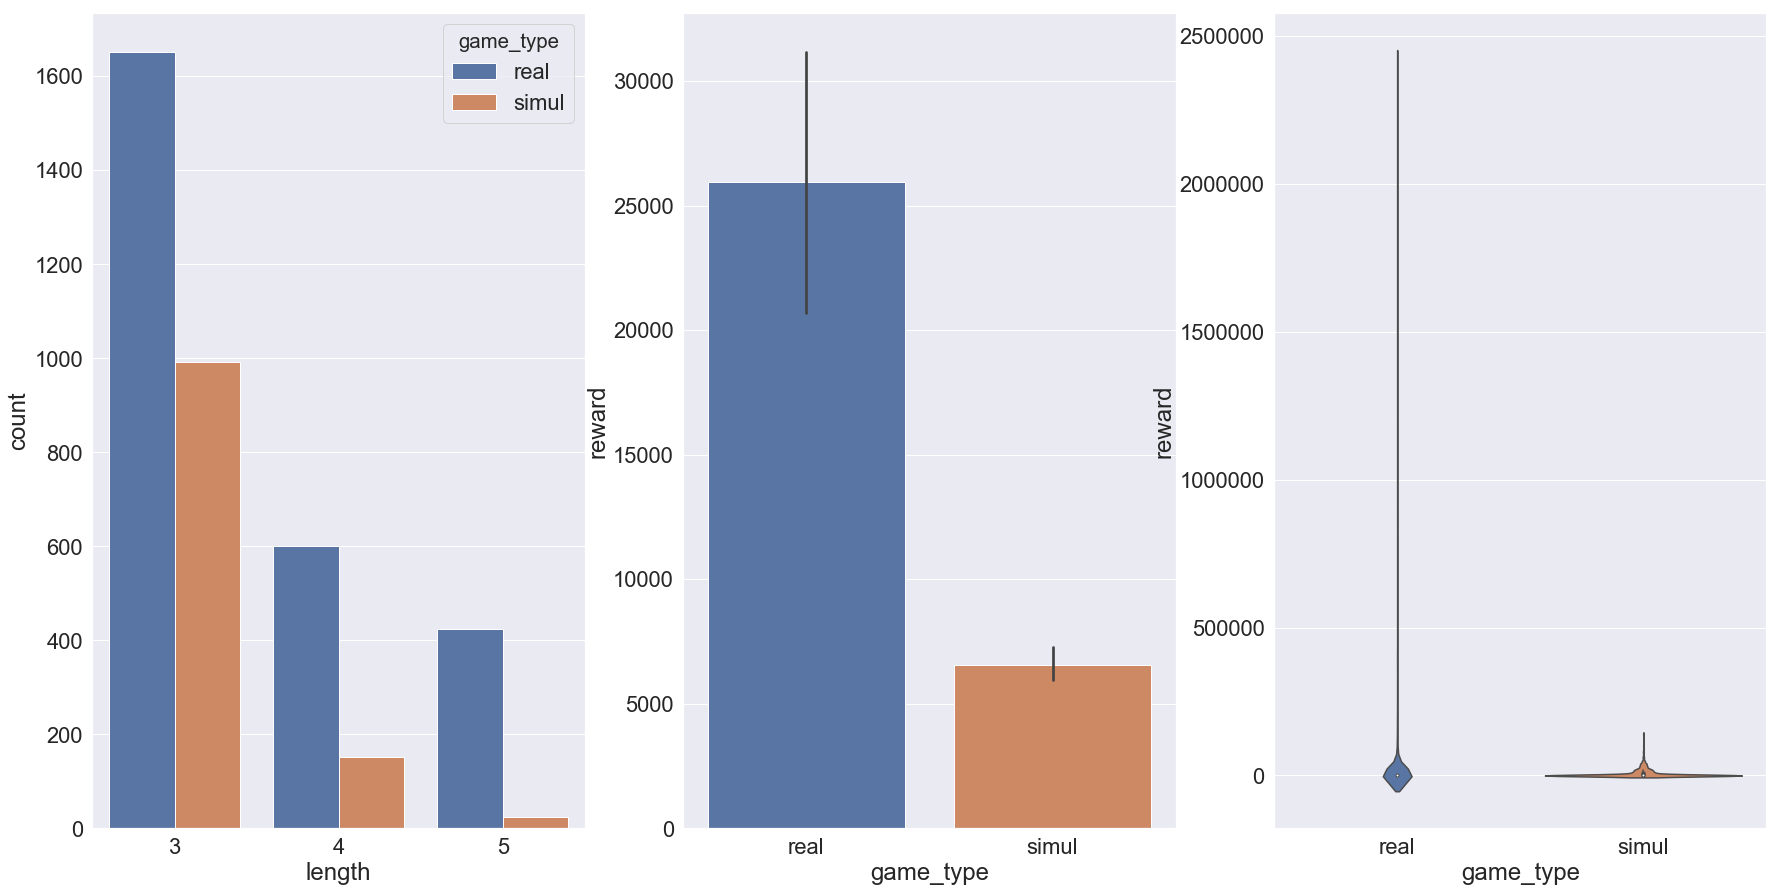

In [46]:
# 게임당 당첨 금액과 당첨된 Symbol의 종류를 담을 list 생성

ms_real_pay_list, ms_real_pay_type_list, ms_real_payline_num = [], [], []
ms_simul_pay_list, ms_simul_pay_type_list, ms_simul_payline_num = [], [], []

for real_game in ms_slot_result_per_game:
    ms_real_pay_list.append(cal_monster_payline(real_game, 2000)[0])
    ms_real_pay_type_list.extend(cal_monster_payline(real_game, 2000)[1])

for simul_game in ms_simul_result_per_game:
    ms_simul_pay_list.append(cal_monster_payline(simul_game, 2000)[0])
    ms_simul_pay_type_list.extend(cal_monster_payline(simul_game, 2000)[1])


# 당첨된 payline의 length를 담을 list 생성

ms_real_payline_length = [len(pay_type) for pay_type in ms_real_pay_type_list]
ms_simul_payline_length = [len(pay_type) for pay_type in ms_simul_pay_type_list]


# 시각화를 위한 DataFrame 생성

df_ms_pay_list = pd.DataFrame(columns=['reward', 'game_type'])
df_ms_pay_list['reward'] = ms_real_pay_list + ms_simul_pay_list
df_ms_pay_list['game_type'] = ['real'] * 2000 + ['simul']*2000


df_ms_payline_length = pd.DataFrame(columns=['length', 'game_type'])
df_ms_payline_length['length'] = ms_real_payline_length + ms_simul_payline_length
df_ms_payline_length['game_type'] = ['real'] * len(ms_real_payline_length) + ['simul'] * len(ms_simul_payline_length)

df_ms_all_payline = pd.DataFrame(columns=['payline_num', 'game_type'])
df_ms_all_payline['payline_num'] = ms_real_payline_num + ms_simul_payline_num
df_ms_all_payline['game_type'] = ['real'] * len(ms_real_payline_num) + ['simul'] * len(ms_simul_payline_num)


# 게임 유형별 hit probability, average reward 출력

print('Monster Real game hit probability : ', round(len([pay for pay in ms_real_pay_list if not pay == 0])/len(ms_real_pay_list)*100,2))
print('Monster Real Average Reward : ', sum(ms_real_pay_list) / len(ms_real_pay_list),'\n')

print('Monster Simulation game hit probability : ', round(len([pay for pay in ms_simul_pay_list if not pay == 0])/len(ms_simul_pay_list)*100,2))
print('Monster Simulation Average Reward : ', sum(ms_simul_pay_list) / len(ms_simul_pay_list))



## 시각화 ##


# 3 x 2 sub plots 생성
gs = gridspec.GridSpec(1, 3)
plt.figure(figsize=(30,15))

# 게임 유형별 reward 빈도 시각화
ax = plt.subplot(gs[0, 0])
sns.countplot(x='length', data=df_ms_payline_length, hue='game_type')


# 게임 유형별 average reward 시각화
ax = plt.subplot(gs[0, 1])
sns.barplot(x='game_type', y='reward', data=df_ms_pay_list)


# payline length 시각화
ax = plt.subplot(gs[0, 2])
sns.violinplot(x='game_type', y='reward', data=df_ms_pay_list)

plt.show()

---

# 3. Masquerade Slot <a name="masque-3"></a>

In [47]:
mq_labels = ['J', 'Q', 'K', 'A', 'F', 'H', 'Ms', 'St', 'Mn', 'Wm', 'Sc', 'W']

In [48]:
# csv 파일 불러오기

mq_slot_result = pd.read_csv('../data/slot_machine/masque_csv/mq_all.csv')
mq_slot_result.head()

,img,classname
0,masque_0_0.jpg,St
1,masque_0_1.jpg,Mn
2,masque_0_2.jpg,A
3,masque_0_3.jpg,A
4,masque_0_4.jpg,K


In [49]:
# 각 칸의 결과마다 game, row, col column 생성

mq_slot_result_game = [int(i_name.split('_')[1]) for n, i_name in enumerate(mq_slot_result['img'])]
mq_slot_result_row = [int(i_name.split('_')[2].split('.')[0]) % 3 + 1 for n, i_name in enumerate(mq_slot_result['img'])]
mq_slot_result_col = [int(i_name.split('_')[2].split('.')[0]) // 3 + 1 for n, i_name in enumerate(mq_slot_result['img'])]

mq_slot_result['game'] = mq_slot_result_game
mq_slot_result['row'] = mq_slot_result_row
mq_slot_result['col'] = mq_slot_result_col

mq_slot_result.head(15)

,img,classname,game,row,col
0,masque_0_0.jpg,St,0,1,1
1,masque_0_1.jpg,Mn,0,2,1
2,masque_0_2.jpg,A,0,3,1
3,masque_0_3.jpg,A,0,1,2
4,masque_0_4.jpg,K,0,2,2
5,masque_0_5.jpg,J,0,3,2
6,masque_0_6.jpg,F,0,1,3
7,masque_0_7.jpg,St,0,2,3
8,masque_0_8.jpg,K,0,3,3
9,masque_0_9.jpg,Wm,0,1,4


In [50]:
tmp = []
mq_slot_result_per_game = []
for n, x in enumerate(mq_slot_result['classname']):
    tmp.append(x)
    if (n+1) % 15 == 0:
        mq_slot_result_per_game.append(tmp)
        tmp = []

## 3.1. 각 Symbol의 출현 빈도 확인 <a name="masque-3-1"></a>

In [51]:
# 각 Symbol의 출현 확률의 구체적인 수치 (%)

mq_slot_result['classname'].value_counts() / len(mq_slot_result) * 100

J     13.430000
K     13.050000
A     12.296667
Q     12.060000
F     10.396667
H      9.200000
Ms     8.403333
St     7.413333
Wm     4.370000
Mn     3.893333
Sc     3.800000
W      1.686667
Name: classname, dtype: float64

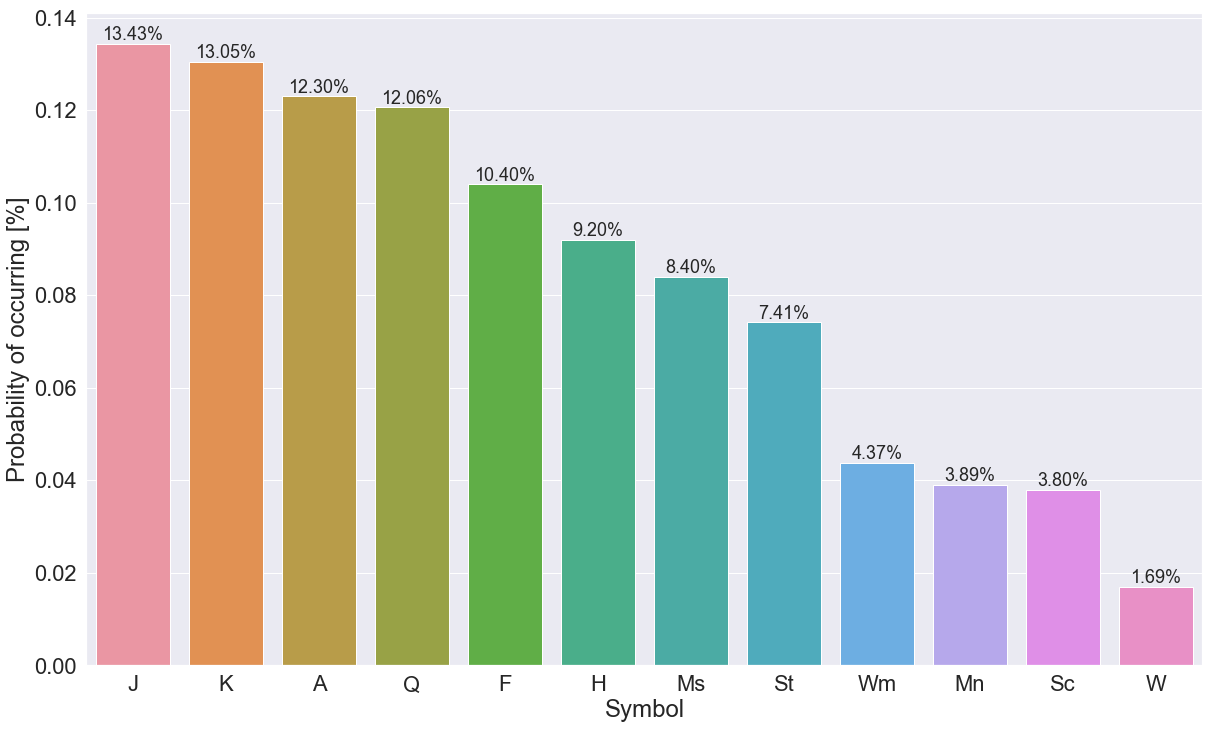

In [52]:
# 각 Symbol의 출현 확률 시각화

plt.figure(figsize=(20,12))
ax = sns.barplot(x=mq_slot_result['classname'].value_counts().index, y=mq_slot_result['classname'].value_counts() / len(mq_slot_result))
plt.xlabel("Symbol")
plt.ylabel("Probability of occurring [%]")


for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2f}%'.format(y*100), (x.mean(), y), ha='center', va='bottom', fontsize=18) # set the alignment of the text

plt.show()

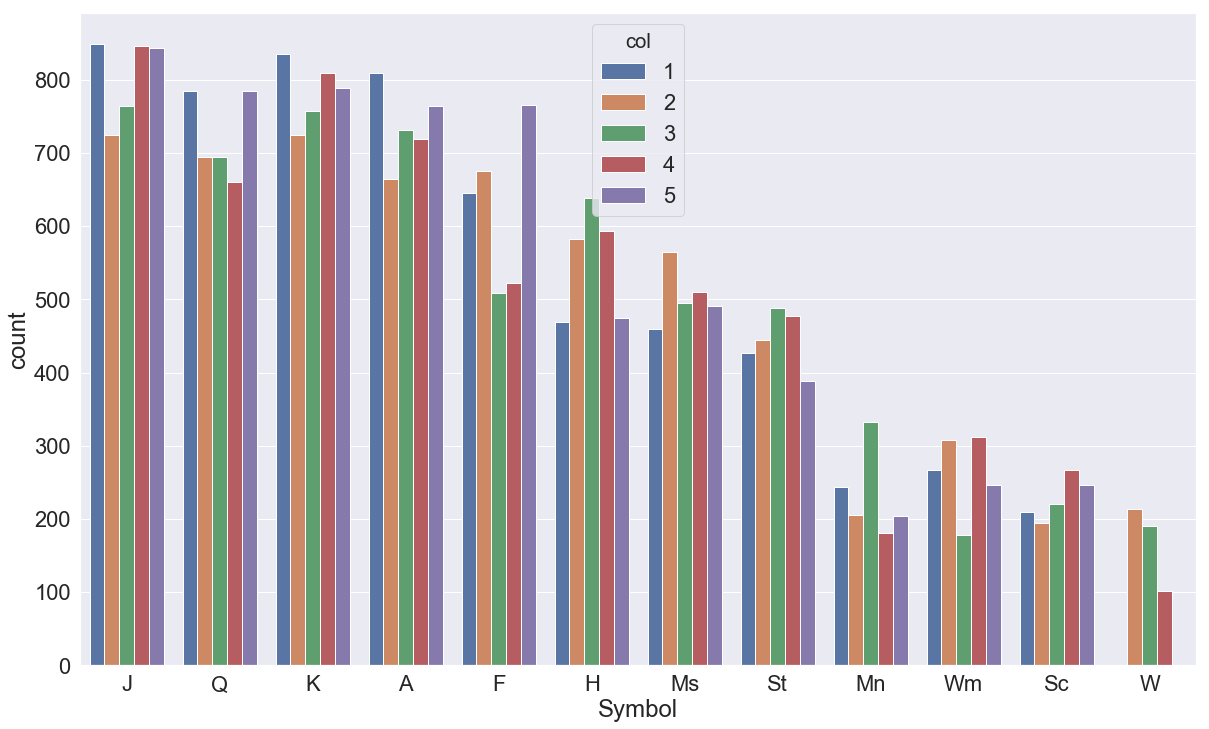

In [53]:
# 각 reel별 출현 횟수 시각화

plt.figure(figsize=(20,12))
sns.countplot(x='classname', data=mq_slot_result, hue='col', order=mq_labels)
plt.xlabel("Symbol")
plt.show()

---

## 3.2 Simulation 데이터 생성 <a name="masque-3-2"></a>

In [54]:
'''
# Baseline Model

Masque Slot 2000번의 실제 게임 데이터를 기반으로 각 Symbol의 출현 빈도 설정 (근사치)

# J   : 13.5 %
# K   : 13 %
# A   : 12 %
# Q   : 12 %
# F   : 10.5 %
# H   : 9 %
# Ms  : 8.5 %
# St  : 7.5 %
# Wm  : 4.5 %
# Mn  : 4 %
# Sc  : 4%
# W   : 1.5 %
'''

# numpy의 randint를 통해 출현 확률을 기반으로 Symbol을 Return하는 함수

def getMasqueSymbol(start, end):
    i = np.random.randint(start, end)
    if i <= 27:
        return 'J'
    elif i <= 53 and i > 27:
        return 'K'
    elif i <= 77 and i > 53:
        return 'A'
    elif i <= 101 and i > 77:
        return 'Q'
    elif i <= 122 and i > 101:
        return 'F'
    elif i <= 140 and i > 122:
        return 'H'
    elif i <= 157 and i > 140:
        return 'Ms'
    elif i <= 172 and i > 157:
        return 'St'
    elif i <= 181 and i > 172:
        return 'Wm'
    elif i <= 189 and i > 181:
        return 'Mn'
    elif i <= 197 and i > 189:
        return 'Sc'
    elif i > 197:
        return 'W'

# 1회의 Spin 실행을 구현한 함수

def spin_masque():
    game = []
    start = 1
    
    for i in range(15):
        # 각 15개의 칸에 Symbol 추가
        if game.count('Sc') >= (i // 3 + 1):
            end = 190
            game.append(getMasqueSymbol(start, end))
        else:
            end = 201
            game.append(getMasqueSymbol(start, end))
    return game

In [55]:
# 실행 결과를 담을 list
mq_simul_result_per_game = []

# 2000번의 게임을 실행
for i in range(2000):
    mq_simul_result_per_game.append(spin_masque())

# 실제 게임 플레이 DataFrame을 불러와서 가상 게임플레이 데이터로 변경

mq_simul_result = mq_slot_result[['classname', 'game', 'row', 'col']]

mq_simul_classname = []

for game in mq_simul_result_per_game:
    for x in game:
        mq_simul_classname.append(x)

mq_simul_result['classname'] = mq_simul_classname

mq_simul_result.head(15)

C:\Users\Lee\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,classname,game,row,col
0,K,0,1,1
1,Q,0,2,1
2,A,0,3,1
3,St,0,1,2
4,K,0,2,2
5,F,0,3,2
6,St,0,1,3
7,J,0,2,3
8,J,0,3,3
9,F,0,1,4


---

## 3.3. Masquerade Slot 시각화 <a name="masque-3-3"></a>

### 3.3.1. SCATTER 비교 <a name="masque-3-3-1"></a>

In [56]:
# 실제 게임의 게임당 SCATTER 출현 횟수를 담은 list를 생성

mq_real_scatter_count =  []
for game in mq_slot_result_per_game:
    mq_real_scatter_count.append(game.count('Sc'))

# 실제 게임의 Spin당 RICHHITS의 출현 갯수

print('# 실제 플레이 데이터의 각 Spin당 SCATTER의 등장 개수')
pd.Series(mq_real_scatter_count).value_counts()

# 실제 플레이 데이터의 각 Spin당 SCATTER의 등장 개수


0    1085
1     712
2     183
3      18
4       2
dtype: int64

In [57]:
# 가상 게임의 게임당 SCATTER 출현 횟수를 담은 list를 생성

mq_simul_scatter_count = []
for game in mq_simul_result_per_game:
    mq_simul_scatter_count.append(game.count('Sc'))

# 가상 게임의 Spin당 RICHHITS의 출현 갯수

pd.Series(mq_simul_scatter_count).value_counts()

0    1071
1     695
2     191
3      41
4       2
dtype: int64

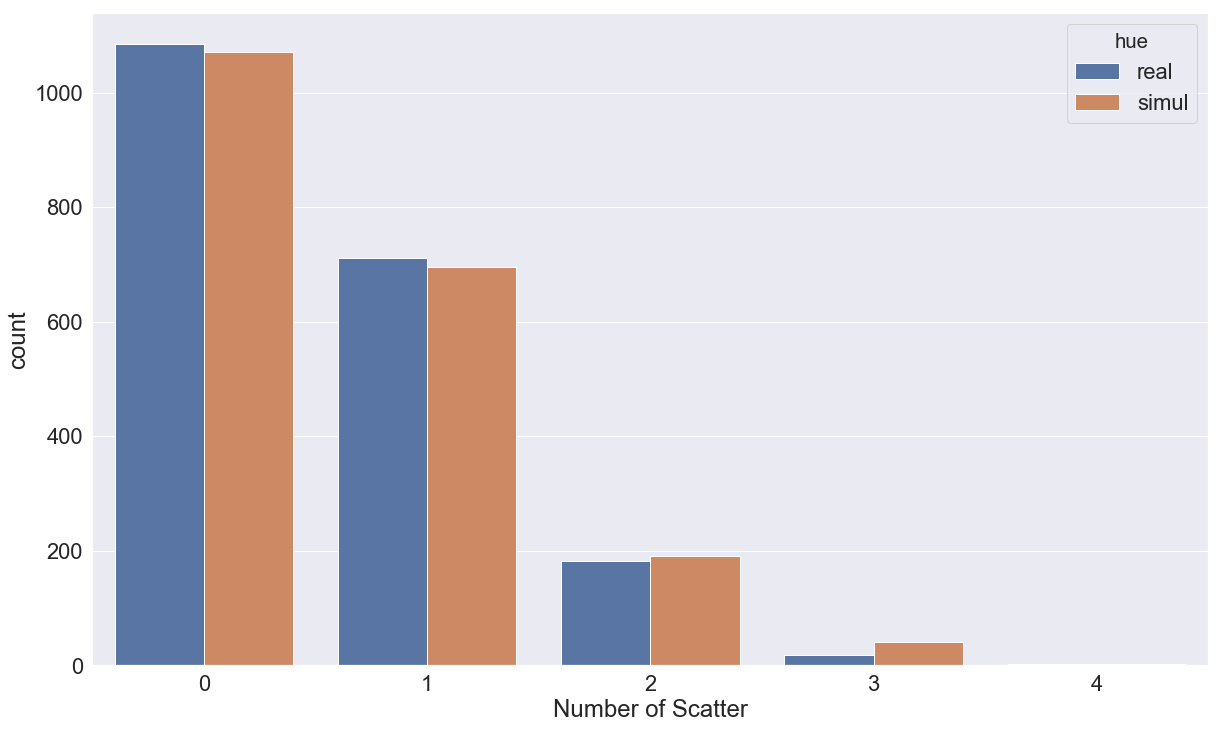

In [58]:
# 비교를 위해 실제, 가상 결과를 담을 DataFrame을 생성

df_mq_scatter = pd.DataFrame(columns=['scatter_count', 'hue'])
df_mq_scatter['scatter_count'] = mq_real_scatter_count + mq_simul_scatter_count
df_mq_scatter['hue'] = ['real'] * 2000 + ['simul'] * 2000

# 실제, 가상의 각 게임당 SCATTER 갯수 시각화

plt.figure(figsize=(20,12))
sns.countplot(x='scatter_count', data=df_mq_scatter, hue='hue')
plt.xlabel("Number of Scatter")
plt.show()

---

### 3.3.2. 각 reel 마다 같은 symbol이 나오는 빈도 비교 <a name="masque-3-3-2"></a>

In [59]:
def getReelInfo(df, reel):
    row_type = []
    reel_symbols = []
    r_list = []
    s = ''
    for n, row in enumerate(df[df['col'] == reel]['classname']):
        r_list.append(row)
        s += row
        if not (n + 1) % 3:
            if r_list[0] == r_list [1] and r_list[1] == r_list[2]:
                row_type.append('1')
            elif r_list[0] == r_list[1] and r_list[0] != r_list[2] and r_list[1] != r_list[2]:
                row_type.append('2-1')
            elif r_list[0] == r_list[2] and r_list[0] != r_list[1] and r_list[2] != r_list[1]:
                row_type.append('2-2')
            elif r_list[1] == r_list[2] and r_list[1] != r_list[0] and r_list[2] != r_list[0]:
                row_type.append('2-3')
            else:
                row_type.append('3')
            r_list = []
            reel_symbols.append(s)
            s= ''
    return row_type, reel_symbols

In [60]:
# 실제 게임의 각 reel의 유형, symbol 저장

mq_real_reel1_rtype, mq_real_reel1_rsymbols = getReelInfo(mq_slot_result, 1)
mq_real_reel2_rtype, mq_real_reel2_rsymbols = getReelInfo(mq_slot_result, 2)
mq_real_reel3_rtype, mq_real_reel3_rsymbols = getReelInfo(mq_slot_result, 3)
mq_real_reel4_rtype, mq_real_reel4_rsymbols = getReelInfo(mq_slot_result, 4)
mq_real_reel5_rtype, mq_real_reel5_rsymbols = getReelInfo(mq_slot_result, 5)

mq_real_reel_rtype = mq_real_reel1_rtype + mq_real_reel2_rtype + mq_real_reel3_rtype+ mq_real_reel4_rtype + mq_real_reel5_rtype 


# 가상 게임의 각 reel의 유형, symbol 저장

mq_simul_reel1_rtype, mq_simul_reel1_rsymbols = getReelInfo(mq_simul_result, 1)
mq_simul_reel2_rtype, mq_simul_reel2_rsymbols = getReelInfo(mq_simul_result, 2)
mq_simul_reel3_rtype, mq_simul_reel3_rsymbols = getReelInfo(mq_simul_result, 3)
mq_simul_reel4_rtype, mq_simul_reel4_rsymbols = getReelInfo(mq_simul_result, 4)
mq_simul_reel5_rtype, mq_simul_reel5_rsymbols = getReelInfo(mq_simul_result, 5)

mq_simul_reel_rtype = mq_simul_reel1_rtype + mq_simul_reel2_rtype + mq_simul_reel3_rtype + mq_simul_reel4_rtype + mq_simul_reel5_rtype


# 비교를 위해 실제 게임 데이터의 reel_type을 담을 DataFrame을 생성

df_mq_rtype = pd.DataFrame(columns=['reel_type', 'reel_num', 'game_type'])
df_mq_rtype['reel_type'] = mq_real_reel_rtype + mq_simul_reel_rtype
df_mq_rtype['reel_num'] = (['reel_1'] * 2000 + ['reel_2'] * 2000 + ['reel_3'] * 2000 + ['reel_4'] * 2000 + ['reel_5'] * 2000) * 2
df_mq_rtype['game_type'] = ['real'] * 10000 + ['simul'] * 10000

df_mq_rtype.head()

,reel_type,reel_num,game_type
0,3,reel_1,real
1,3,reel_1,real
2,3,reel_1,real
3,3,reel_1,real
4,3,reel_1,real


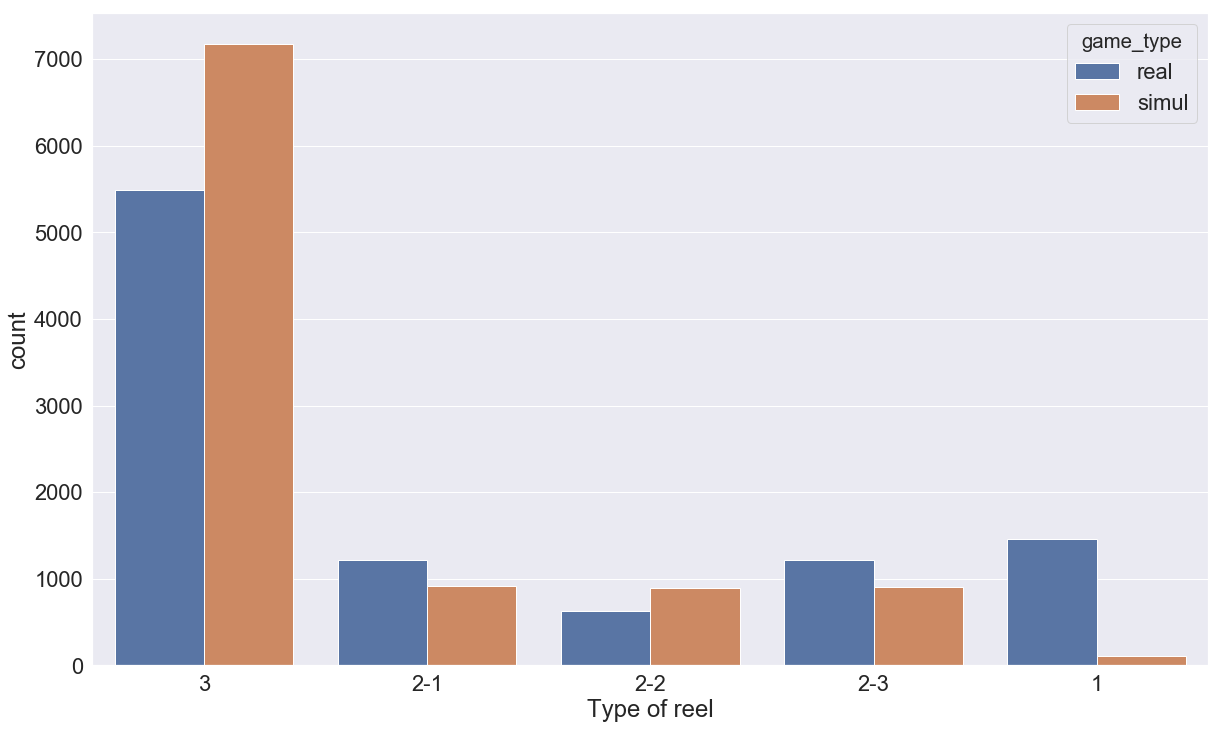

In [61]:
# 모든 reel의 reel_type 시각화

plt.figure(figsize=(20,12))
sns.countplot(x='reel_type', data=df_mq_rtype, order=['3', '2-1', '2-2', '2-3', '1'], hue='game_type')
plt.xlabel("Type of reel")
plt.show()

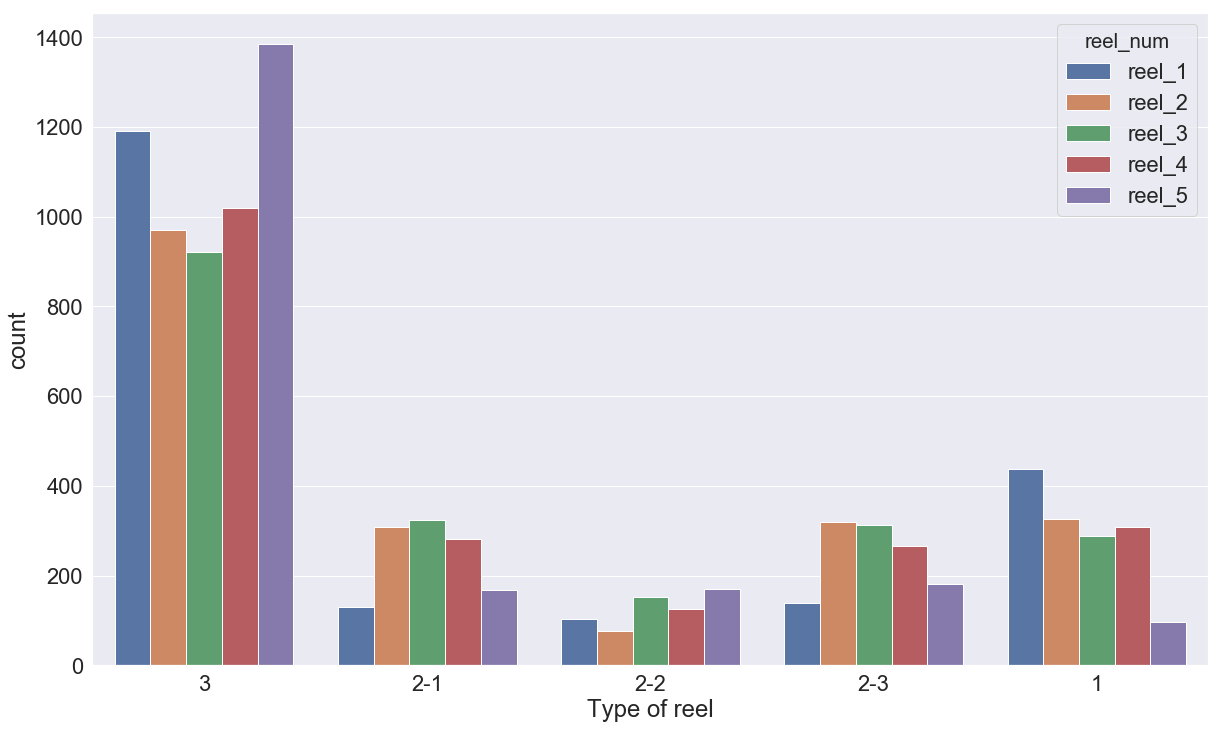

In [62]:
# 각 reel_num 별 reel_type 시각화

plt.figure(figsize=(20,12))
sns.countplot(x='reel_type', data=df_mq_rtype[df_mq_rtype['game_type']=='real'], hue='reel_num', order=['3', '2-1', '2-2', '2-3', '1'])
plt.xlabel("Type of reel")
plt.show()

---

### 3.3.3. 한 번의 spin마다 등장하는 symbol의 개수 비교 <a name="masque-3-3-3"></a>

In [63]:
# 실제 게임의 게임당 unique symbol의 개수를 담은 list를 생성

mq_real_unique_count = []

for i in range(2000):
    mq_real_unique_count.append(len(set(mq_slot_result_per_game[i])))


# 가상 게임의 게임당 unique symbol의 개수를 담은 list를 생성

mq_simul_unique_count = []

for i in range(2000):
    mq_simul_unique_count.append(len(set(mq_simul_result_per_game[i])))


# 실제 게임 데이터와 가상 게임 데이터 병합
df_mq_real_simul = pd.DataFrame(columns=['classname', 'game_type'])
df_mq_real_simul['classname'] = pd.concat([mq_slot_result['classname'], mq_simul_result['classname']])
df_mq_real_simul['game_type'] = ['real'] * len(mq_slot_result['classname']) + ['simul'] * len(mq_simul_result['classname'])
df_mq_real_simul = df_mq_real_simul.reset_index(drop=True)


# 비교를 위해 unique symbol의 실제, 가상 결과를 담을 DataFrame을 생성

df_mq_unique_count = pd.DataFrame(columns=['unique_count', 'game_type'])
df_mq_unique_count['unique_count'] = mq_real_unique_count + mq_simul_unique_count
df_mq_unique_count['game_type'] = ['real'] * len(mq_real_unique_count) + ['simul'] * len(mq_simul_unique_count)

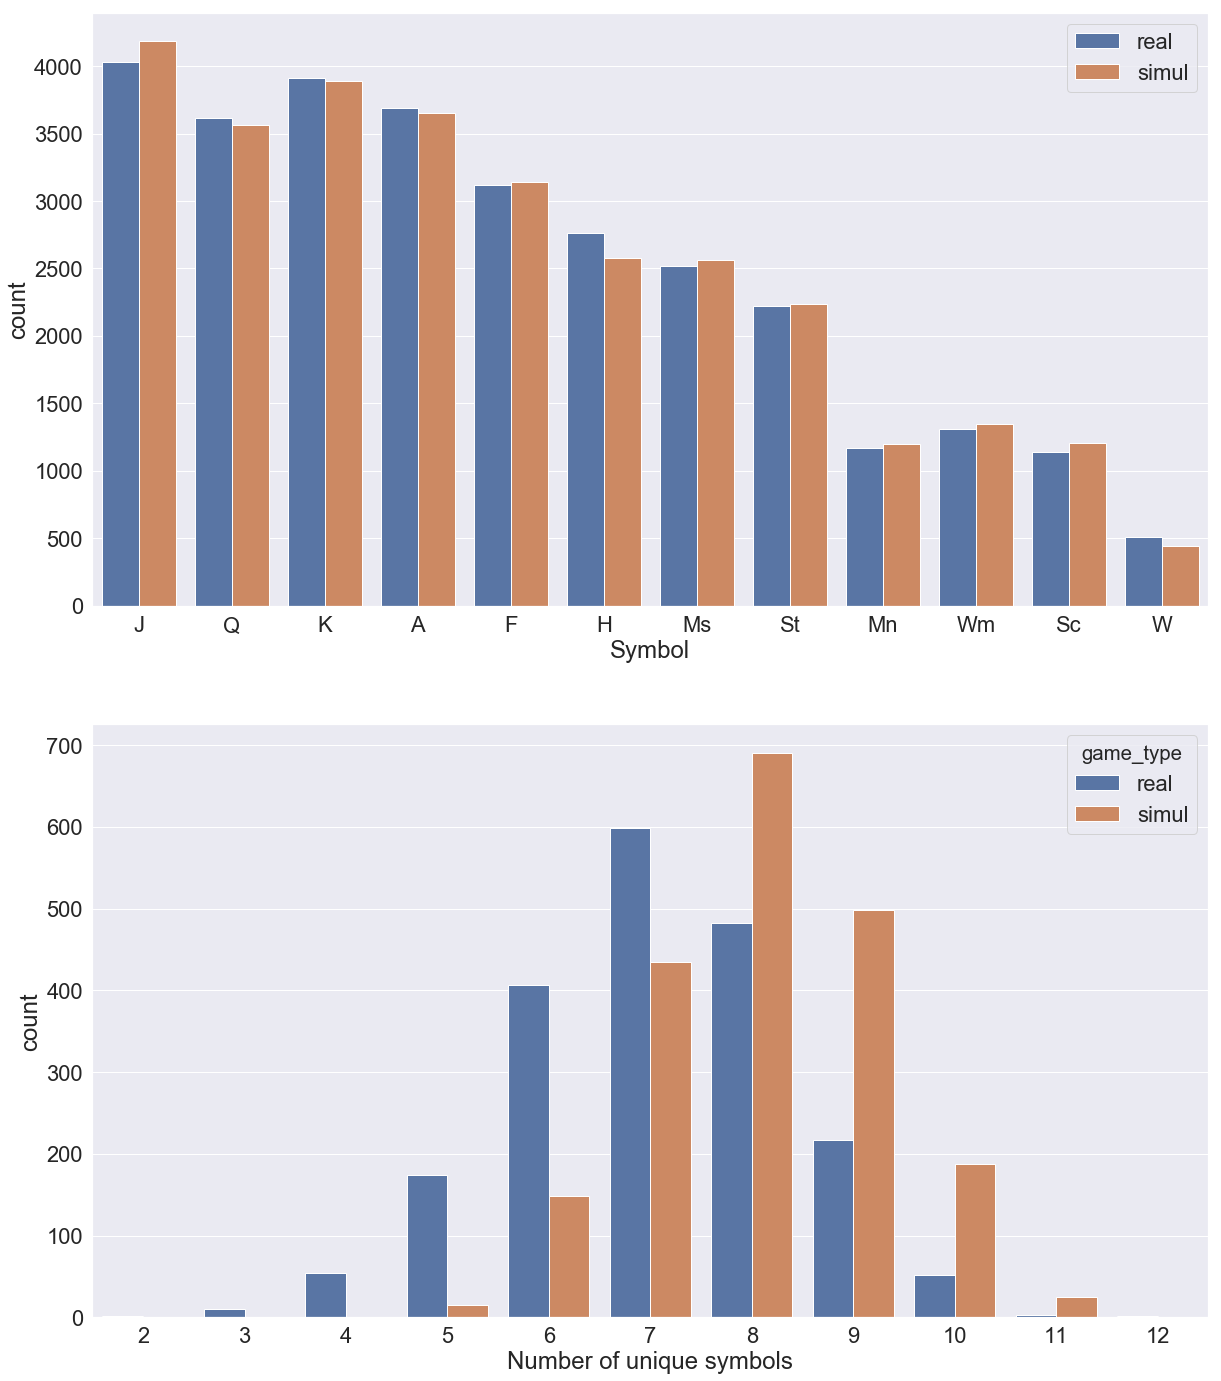

In [64]:
plt.figure(figsize=(20,24))
plt.subplot(2,1,1)
sns.countplot(x='classname', data=df_mq_real_simul, hue='game_type', order=mq_labels)
plt.xlabel('Symbol')

plt.legend()
plt.subplot(2,1,2)
sns.countplot(x='unique_count', data=df_mq_unique_count, hue='game_type')
plt.xlabel('Number of unique symbols')
plt.show()

---

### 3.3.4. 획득한 reward 금액과 payline의 길이(x3, x4, x5) 비교 <a name="masque-3-3-4"></a>

In [65]:
# 비교에 필요한 함수 생성

mq_paytable = pd.read_csv('../data/slot_machine/masque_csv/mq_paytable.csv')
mq_paylines = [[0, 3, 6, 9, 12],
                 [1, 4, 7, 10, 13],
                 [2, 5, 8, 11, 14],
                 [0, 4, 8, 10, 12],
                 [2, 4, 6, 10, 14],
                 [0, 3, 7, 11, 14],
                 [2, 5, 7, 9, 12],
                 [0, 4, 7, 10, 12],
                 [1, 5, 8, 11, 13],
                 [1, 3, 6, 9, 13],
                 [2, 4, 7, 10, 14],
                 [0, 4, 6, 10, 12],
                 [1, 5, 7, 11, 13],
                 [1, 3, 7, 9, 13],
                 [2, 4, 8, 10, 14],
                 [1, 4, 6, 10, 13],
                 [1, 4, 8, 10, 13],
                 [0, 5, 6, 11, 12],
                 [2, 3, 8, 9, 14],
                 [0, 3, 8, 9, 12],
                 [2, 5, 6, 11, 14],
                 [0, 5, 7, 9, 14],
                 [2, 3, 7, 11, 12],
                 [0, 5, 8, 11, 12],
                 [2, 3, 6, 9, 14],
                 [1, 3, 8, 10, 12],
                 [1, 5, 6, 10, 14],
                 [0, 3, 7, 9, 12],
                 [2, 5, 7, 11, 14],
                 [0, 5, 7, 11, 12]]

def get_masque_symbol(lst):
    if len(set(lst)) < 2:
        return lst[0]
    else:
        for x in list(set(lst)):
            if x != 'W':
                return x
            else:
                continue

def cal_masque_payline(game, bpl):
    bpl = bpl // 3
    pay = 0
    pay_type_list = []
    for payline in mq_paylines:
        tmp = []
        for i in range(5):
            if i == 4:
                tmp.append(game[payline[i]])
                break
            if i == 0 and game[payline[i]] == 'W':
                tmp.append(game[payline[i]])
            elif game[payline[i]] != game[payline[i+1]] and game[payline[i+1]] != 'W':
                if game[payline[i+1]] in tmp:
                    tmp.append(game[payline[i]])
                else:
                    tmp.append(game[payline[i]])
                    break
            else:
                tmp.append(game[payline[i]])
        if len(tmp) >= 3:
            sym = get_masque_symbol(tmp)
            pay += mq_paytable.loc[len(tmp)-3, sym] * bpl
            pay_type_list.append(tmp)
    return pay, pay_type_list


Masque Real game hit probability :  31.6
Masque Real Average Reward :  22925.0 

Masque Simulation game hit probability :  27.6
Masque Simulation Average Reward :  4392.5


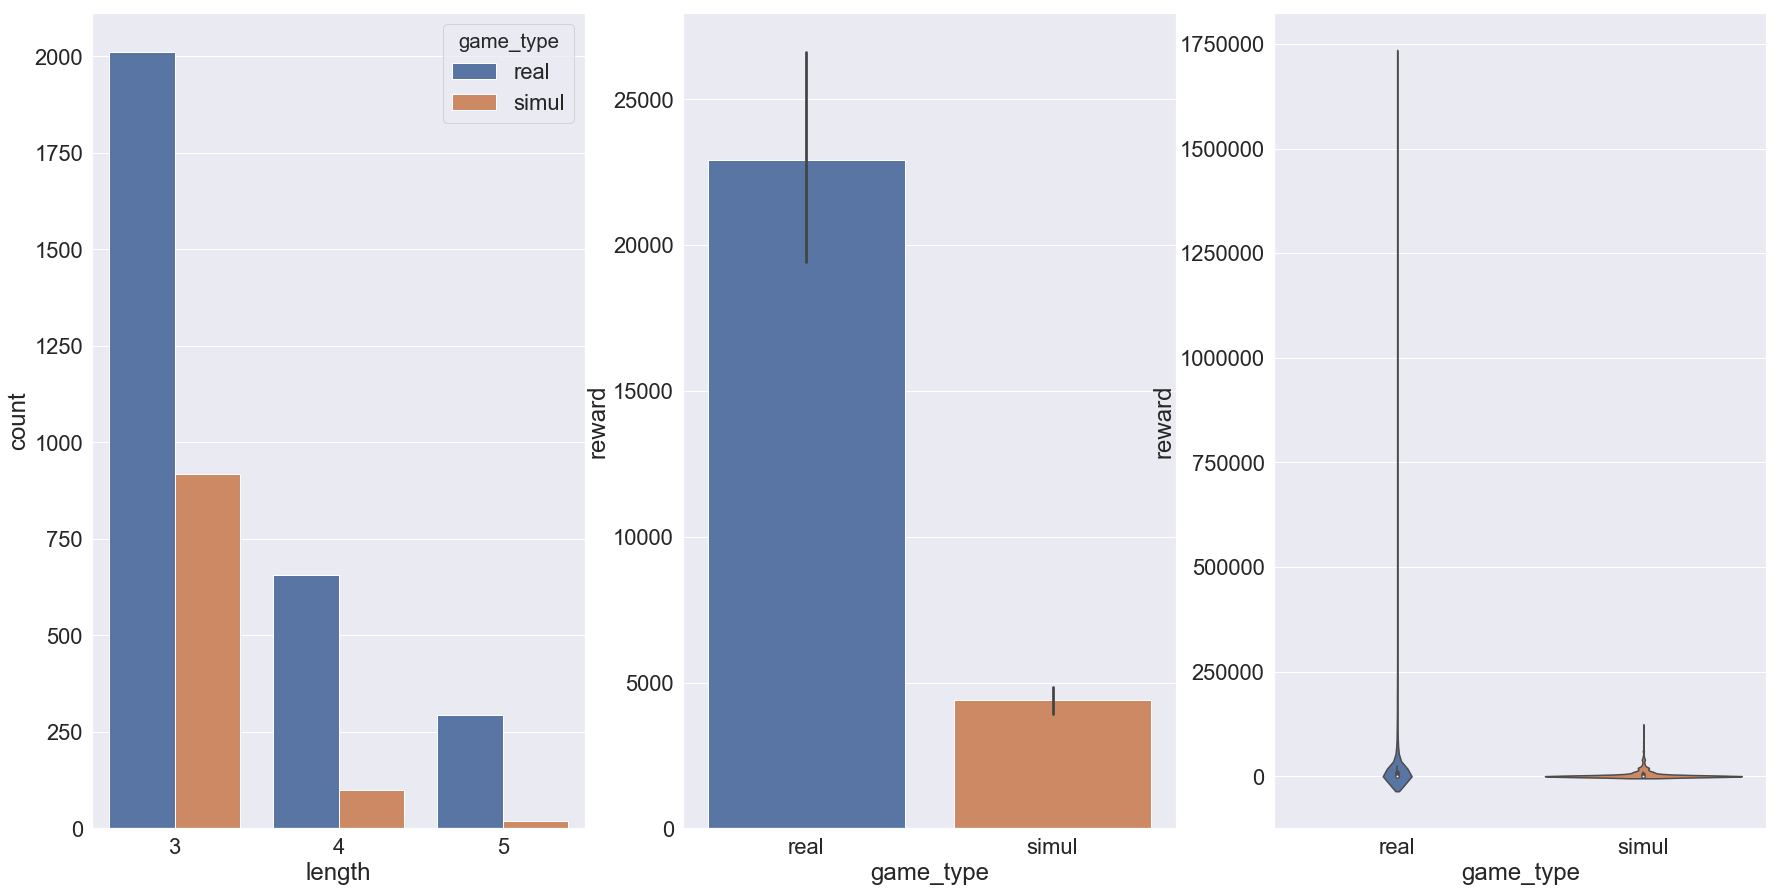

In [66]:
# 게임당 당첨 금액과 당첨된 Symbol의 종류를 담을 list 생성

mq_real_pay_list, mq_real_pay_type_list, mq_real_payline_num = [], [], []
mq_simul_pay_list, mq_simul_pay_type_list, mq_simul_payline_num = [], [], []

for real_game in mq_slot_result_per_game:
    mq_real_pay_list.append(cal_masque_payline(real_game, 1500)[0])
    mq_real_pay_type_list.extend(cal_masque_payline(real_game, 1500)[1])

for simul_game in mq_simul_result_per_game:
    mq_simul_pay_list.append(cal_masque_payline(simul_game, 1500)[0])
    mq_simul_pay_type_list.extend(cal_masque_payline(simul_game, 1500)[1])


# 당첨된 payline의 length를 담을 list 생성

mq_real_payline_length = [len(pay_type) for pay_type in mq_real_pay_type_list]
mq_simul_payline_length = [len(pay_type) for pay_type in mq_simul_pay_type_list]


# 시각화를 위한 DataFrame 생성

df_mq_pay_list = pd.DataFrame(columns=['reward', 'game_type'])
df_mq_pay_list['reward'] = mq_real_pay_list + mq_simul_pay_list
df_mq_pay_list['game_type'] = ['real'] * 2000 + ['simul']*2000


df_mq_payline_length = pd.DataFrame(columns=['length', 'game_type'])
df_mq_payline_length['length'] = mq_real_payline_length + mq_simul_payline_length
df_mq_payline_length['game_type'] = ['real'] * len(mq_real_payline_length) + ['simul'] * len(mq_simul_payline_length)

df_mq_all_payline = pd.DataFrame(columns=['payline_num', 'game_type'])
df_mq_all_payline['payline_num'] = mq_real_payline_num + mq_simul_payline_num
df_mq_all_payline['game_type'] = ['real'] * len(mq_real_payline_num) + ['simul'] * len(mq_simul_payline_num)


# 게임 유형별 hit probability, average reward 출력

print('Masque Real game hit probability : ', round(len([pay for pay in mq_real_pay_list if not pay == 0])/len(mq_real_pay_list)*100,2))
print('Masque Real Average Reward : ', sum(mq_real_pay_list) / len(mq_real_pay_list),'\n')

print('Masque Simulation game hit probability : ', round(len([pay for pay in mq_simul_pay_list if not pay == 0])/len(mq_simul_pay_list)*100,2))
print('Masque Simulation Average Reward : ', sum(mq_simul_pay_list) / len(mq_simul_pay_list))



## 시각화 ##


# 3 x 2 sub plots 생성
gs = gridspec.GridSpec(1, 3)
plt.figure(figsize=(30,15))

# 게임 유형별 reward 빈도 시각화
ax = plt.subplot(gs[0, 0])
sns.countplot(x='length', data=df_mq_payline_length, hue='game_type')


# 게임 유형별 average reward 시각화
ax = plt.subplot(gs[0, 1])
sns.barplot(x='game_type', y='reward', data=df_mq_pay_list)


# payline length 시각화
ax = plt.subplot(gs[0, 2])
sns.violinplot(x='game_type', y='reward', data=df_mq_pay_list)

plt.show()

# 4. 보완된 가상 Slot과 실제 Slot 비교

In [67]:
import imsi
from tqdm import tqdm
import copy

In [71]:
N_SIMULATIONS = 100
N_ROUNDS = 2000

# 게임당 당첨 금액과 당첨된 Symbol의 종류를 담을 list 생성

pl_pay_type_count = [0] * 3

pl_round_adj_simul_pay_list, pl_round_adj_simul_pay_type_list = [], []
pl_sim_adj_simul_pay_list = []
pl_hit_prob = [0, 0]
pl_final_reward_array = np.zeros((N_SIMULATIONS,N_ROUNDS))

for simulation in tqdm(range(N_SIMULATIONS)):
    for round_id in range(N_ROUNDS):
        game = spin_platinum()
        rw = calPlatinumPayline(game, 2000)[0]
        pl_final_reward_array[simulation][round_id] = rw
        pl_round_adj_simul_pay_type_list.extend(calPlatinumPayline(game, 2000)[1])
        if rw:
            pl_hit_prob[0] += 1
        else:
            pl_hit_prob[1] += 1
    pl_adj_simul_payline_length = [len(pay) for pay in pl_round_adj_simul_pay_type_list]
    for length in pl_adj_simul_payline_length:
        pl_pay_type_count[length-3] += 1
    pl_round_adj_simul_pay_type_list = []


# 당첨된 payline의 length를 담을 list 생성

pl_pay_type_count = [count // N_SIMULATIONS for count in pl_pay_type_count]
pl_simul_payline_length = [3] * pl_pay_type_count[0] + [4] * pl_pay_type_count[1] + [5] * pl_pay_type_count[2]
pl_final_simul_pay_list = pl_final_reward_array.mean(axis=0).tolist()

# 시각화를 위한 DataFrame 생성

df_pl_final_payline_length = pd.DataFrame(columns=['length', 'game_type'])
df_pl_final_payline_length['length'] = pl_real_payline_length + pl_simul_payline_length
df_pl_final_payline_length['game_type'] = ['real'] * len(pl_real_payline_length) + ['simul'] * len(pl_simul_payline_length)

df_pl_final_pay_list = pd.DataFrame(columns=['reward', 'game_type'])
df_pl_final_pay_list['reward'] = pl_real_pay_list + pl_final_simul_pay_list
df_pl_final_pay_list['game_type'] = ['real'] * len(pl_real_pay_list) + ['simul'] * len(pl_final_simul_pay_list)



100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:08<00:00,  1.87s/it]


Platinum Real game hit probability :  38.55
Platinum Real Average Reward :  34503.0 

Platinum Simulation game hit probability :  58.66
Platinum Simulation Average Reward :  38910.74


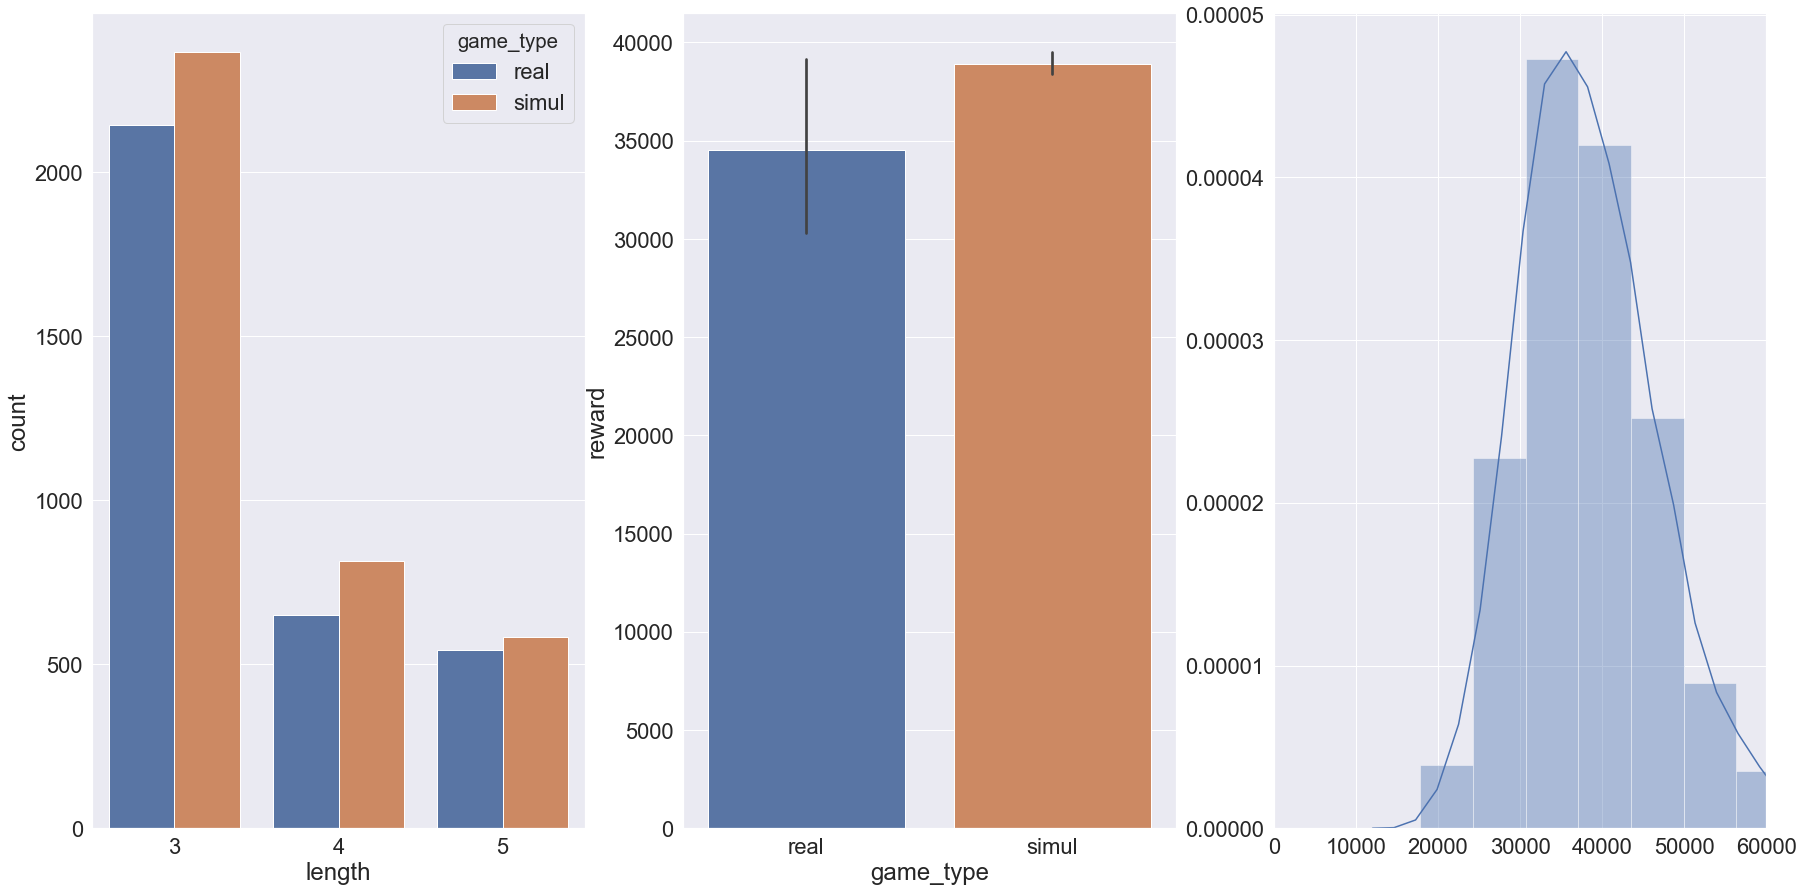

In [77]:
# 게임 유형별 hit probability, average reward 출력

print('Platinum Real game hit probability : ', round(len([pay for pay in pl_real_pay_list if not pay == 0])/len(pl_real_pay_list)*100,2))
print('Platinum Real Average Reward : ', sum(pl_real_pay_list) / len(pl_real_pay_list),'\n')

print('Platinum Simulation game hit probability : ', round(pl_hit_prob[0]/sum(pl_hit_prob)*100, 2))
print('Platinum Simulation Average Reward : ', sum(pl_final_simul_pay_list) / len(pl_final_simul_pay_list))

## 시각화 ##


# 3 x 2 sub plots 생성
gs = gridspec.GridSpec(1, 3)
plt.figure(figsize=(30,15))

# 게임 유형별 reward 빈도 시각화
ax = plt.subplot(gs[0, 0])
sns.countplot(x='length', data=df_pl_final_payline_length, hue='game_type')


# 게임 유형별 average reward 시각화
ax = plt.subplot(gs[0, 1])
sns.barplot(x='game_type', y='reward', data=df_pl_final_pay_list)


# payline length 시각화
ax = plt.subplot(gs[0, 2])
sns.distplot(pl_final_simul_pay_list)
plt.xlim(0, 60000)
plt.show()

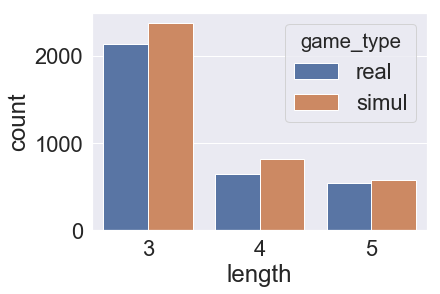

In [43]:
pl_simul_payline_length = [3] * pl_pay_type_count[0] + [4] * pl_pay_type_count[1] + [5] * pl_pay_type_count[2]

df_pl_final_payline_length = pd.DataFrame(columns=['length', 'game_type'])
df_pl_final_payline_length['length'] = pl_real_payline_length + pl_simul_payline_length
df_pl_final_payline_length['game_type'] = ['real'] * len(pl_real_payline_length) + ['simul'] * len(pl_simul_payline_length)

sns.countplot(x='length', data=df_pl_final_payline_length, hue='game_type')

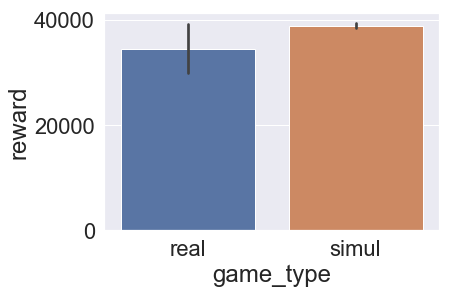

In [66]:
pl_final_simul_pay_list = pl_final_reward_array.mean(axis=0).tolist()

df_pl_final_pay_list = pd.DataFrame(columns=['reward', 'game_type'])
df_pl_final_pay_list['reward'] = pl_real_pay_list + pl_final_simul_pay_list
df_pl_final_pay_list['game_type'] = ['real'] * len(pl_real_pay_list) + ['simul'] * len(pl_final_simul_pay_list)

sns.barplot(x='game_type', y='reward', data=df_pl_final_pay_list)

In [25]:
pl_pay_type_count

[1181, 406, 288]

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:19<00:00,  1.25it/s]


35162.52


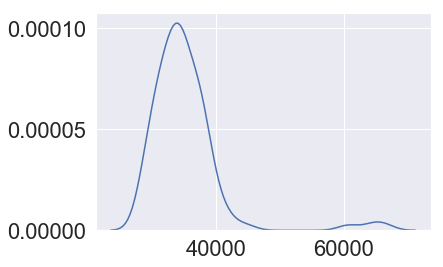

In [94]:
N_SIMULATION = 100
N_ROUNDS = 1000
bpl = 2000
x = 2.6
y = 6
z = 4.8

round_reward_list = []
simul_reward_list = []

platinum_model_final = imsi.game_platinum(bpl, x, y, z)

for simulation in tqdm(range(N_SIMULATION)):
    for round_id in range(N_ROUNDS):
        round_reward_list.append(platinum_model_final.play())
    simul_reward_list.append(sum(round_reward_list) / len(round_reward_list))
    round_reward_list = []
print(sum(simul_reward_list) / len(simul_reward_list))

sns.kdeplot(simul_reward_list)
plt.xlim(0, 60000)
plt.show()

In [273]:
def getWeightedProbability(game):
    weight = [25, 19, 27, 24, 23, 19, 15, 16, 18, 6, 8]
    switch = [1] * 11
    game_copy = game.copy()
    reel_list = []
    tmp = []
    count = [0] * 11
    itr = 0
    while(len(game_copy) >= 3):
        for i in range(3):
            tmp.append(game_copy.pop(0))
        print(tmp)
        reel_list.append(tmp)
        print(reel_list)
        for n, s in enumerate(pl_labels):
            
            if s in reel_list[itr]:
                count[n] += 1
            
            if s in tmp and s != 'R':
                switch[n] *= 1.5
        tmp = []
        itr += 1
    for i in range(len(count)):
        if count[i] == 2:
            switch *= 4
        elif count[i] == 3:
            switch *= 3
        elif count[i] == 4:
            switch *= 2
        else:
            pass
    probs = [w*(switch[n]) for n, w in enumerate(weight)]
    
    return probs, count